In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
# Import Python Libraries
import numpy as np
import glob
import os,sys
import iris
import iris.plot as iplt
from iris.analysis import MEAN, MAX, SUM
import logging 
from netCDF4 import Dataset
acpc_workspace='/gws/nopw/j04/acpc'
#sys.path.append(os.path.join(acpc_workspace,'houston_deep_convection/Intercomparison/acpc_intercomparison'))
sys.path.append('/home/users/pmarinescu/acpc_intercomparison_3')
sys.path.append('/home/users/pmarinescu')
from acpc_intercomparison_3 import load_variable_cube,color,variable_names,directory,filename
import copy

import matplotlib
matplotlib.pyplot.switch_backend('agg')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
%matplotlib inline

#from Setup_intercomparison import load_variable_cube,color,variable_names,directory,filename
from collections import  OrderedDict

import warnings
warnings.filterwarnings('ignore', category=UserWarning, append=True)
warnings.filterwarnings('ignore', category=RuntimeWarning, append=True)
warnings.filterwarnings('ignore', category=FutureWarning, append=True)

OrderedDict([('WRF_OXF', OrderedDict([('AccumPrecip', 'RAINNC'), ('OLR', 'OLR'), ('W', 'W'), ('T', 'air_temperature'), ('P', 'air_pressure'), ('rho', 'RHO'), ('U', 'U'), ('V', 'V'), ('QV', 'QVAPOR'), ('LH', 'LHRTOT'), ('QCLD', 'QCLOUD'), ('QRAIN', 'QRAIN'), ('QICE', 'QICE'), ('QSNOW', 'QSNOW'), ('QGRA', 'QGRAUP'), ('NCLD', 'QNCLOUD'), ('NRAIN', 'QNRAIN'), ('NICE', 'QNICE'), ('NSNOW', 'QNSNOW'), ('NGRA', 'QNGRAUPEL'), ('NAERO', 'NAER1'), ('QCOND', 'PCC'), ('QDEP', ''), ('QCNUC', ''), ('QINUC', 'MNUCCD'), ('liquid_hydrometeors', ['QCLOUD', 'QRAIN']), ('ice_hydrometeors', ['QICE', 'QSNOW', 'QGRAUP']), ('hydrometeors', ['QCLOUD', 'QRAIN', 'QICE', 'QSNOW', 'QGRAUP'])])), ('WRF_NASA', OrderedDict([('AccumPrecip', 'RAINNC'), ('OLR', 'TLWUP'), ('W', 'W'), ('T', 'air_temperature'), ('P', 'air_pressure'), ('rho', 'RHO'), ('U', 'U'), ('V', 'V'), ('QV', 'QVAPOR'), ('LH', 'LATHEAT'), ('QCLD', 'QCLOUD'), ('QRAIN', 'QRAIN'), ('QICE', 'QICE'), ('QSNOW', 'QSNOW'), ('QGRA', 'QGRAUP'), ('NCLD', 'QNCLOUD'

In [3]:
#from Setup_intercomparison import load_variable_cube,color,variable_names,directory,filename

In [4]:
########################
savedir=os.path.join(acpc_workspace,'public/pmarin','BAMS','Figs_2024')
os.makedirs(savedir,exist_ok=True)

In [5]:
print(savedir)

/gws/nopw/j04/acpc/public/pmarin/BAMS/Figs_2024


In [6]:
#Set filename to StageIV Data
filename_st4 = '/gws/nopw/j04/acpc/houston_deep_convection/Stage4/Stage4.nc'

In [7]:
# Create Blank Dictionary Items to Store Filenamesd
data = Dataset(filename_st4)

In [8]:
print(data)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Conventions: CF-1.5
    dimensions(sizes): x(77), y(76), time(24)
    variables(dimensions): float64 precipitation(x,y,time), int64 x(x), int64 y(y), float64 time(time), float32 latitude(x,y), float32 longitude(x,y)
    groups: 



In [9]:
precip_hr = data.variables['precipitation'][:]
precip_cum = np.nancumsum(precip_hr,axis=2)
lat_st4 = data.variables['latitude'][:]
lon_st4 = data.variables['longitude'][:]
time_st4 = data.variables['time'][:]

In [10]:
print(time_st4)
print(np.shape(lat_st4))

[15875.5        15875.54166667 15875.58333333 15875.625
 15875.66666667 15875.70833333 15875.75       15875.79166667
 15875.83333333 15875.875      15875.91666667 15875.95833333
 15876.         15876.04166667 15876.08333333 15876.125
 15876.16666667 15876.20833333 15876.25       15876.29166667
 15876.33333333 15876.375      15876.41666667 15876.45833333]
(77, 76)


In [11]:
#np.min(lon)

In [12]:
########### MODEL STUFFF
models=[]
models.append('RAMS_CSU')
models.append('COSMO_KIT')
models.append('UM_LEEDS')
models.append('WRF_NASA')
models.append('MesoNH_Toulouse')
models.append('WRF_OXF')
models.append('WRF_PNNL')


In [13]:
#plotdir=os.path.join(acpc_workspace,'public/acpc/pmarin','Plots_Apr2020')
#os.makedirs(plotdir,exist_ok=True)

#savedir=os.path.join(acpc_workspace,'houston_deep_convection/Processing','Apr_2020BC')
#os.makedirs(savedir,exist_ok=True)


In [14]:
#Set models and cases to process:

models=[]
models.append('COSMO_KIT')
models.append('ICON')
models.append('MesoNH_Toulouse')
models.append('RAMS_CSU')
models.append('UM_LEEDS')
models.append('WRF_NASA')
models.append('WRF_OXF')
models.append('WRF_PNNL')

modelnames=[]
modelnames.append('COSMO')
modelnames.append('ICON')
modelnames.append('MesoNH')
modelnames.append('RAMS')
modelnames.append('UM')
modelnames.append('NU-WRF')
modelnames.append('WRF-Morr')
modelnames.append('WRF-SBM')


logging.info(f'Running script for models {models}')

cases=[]
cases.append('CLN')
cases.append('POL')

casenames=[]
casenames.append('Low-Aero')
casenames.append('High-Aero')

ls = OrderedDict()
ls['CLN'] = '--'
ls['POL'] = '-'



logging.info(f'Running script for cases {cases}')

ylbl_txt = 'Domain Mean \n Accumulated Precip.'

#### SET DATE SPECIFICS
#import matplotlib.dates as mdates
#dateFmt = mdates.DateFormatter('%HH')
#dateB = datetime.datetime(2013,6,19,16)
#dateE = datetime.datetime(2013,6,20,4)3
#time_range=[dateB,dateE]
#constraint_time=iris.Constraint(time = lambda cell: time_range[0]<= cell <=  time_range[1])

#constraint_lat=iris.Constraint(latitude = lambda cell: time_range[0]<= cell <=  time_range[1])
#constraint_lon=iris.Constraint(time = lambda cell: time_range[0]<= cell <=  time_range[1])


In [15]:
# Create Blank Dictionary Items to Store Filenames
files=OrderedDict()
dx='500m'
dt='5m'
files['CLN']=OrderedDict()
files['CLN'][dx]=OrderedDict()
files['CLN'][dx][dt]=OrderedDict()
files['POL']=OrderedDict()
files['POL'][dx]=OrderedDict()
files['POL'][dx][dt]=OrderedDict()

for model in models:
    for case in cases:

        if model == 'ICON':
            continue
        print(directory[case][dx][dt][model])
        files[case][dx][dt][model]=glob.glob(os.path.join(directory[case][dx][dt][model],filename[dx][dt][model]))
        files[case][dx][dt][model]=sorted(files[case][dx][dt][model])

logging.info(f'filenames set up for all models and cases')

/gws/nopw/j04/acpc/houston_deep_convection/COSMO_KIT/1mode/CLN/500m
/gws/nopw/j04/acpc/houston_deep_convection/COSMO_KIT/1mode/POL/500m
/gws/nopw/j04/acpc/houston_deep_convection/MesoNH_Toulouse/1mode/CLN/5min/500m/
/gws/nopw/j04/acpc/houston_deep_convection/MesoNH_Toulouse/1mode/POL/5min/500m/
/gws/nopw/j04/acpc/houston_deep_convection/RAMS_CSU/1mode/CLN/5min/g3
/gws/nopw/j04/acpc/houston_deep_convection/RAMS_CSU/1mode/POL/5min/g3
/gws/nopw/j04/acpc/houston_deep_convection/UM_Leeds/1mode/CLN/0p5km_5m
/gws/nopw/j04/acpc/houston_deep_convection/UM_Leeds/1mode/POL/0p5km_5m
/gws/nopw/j04/acpc/houston_deep_convection/WRF_GISS/1mode/CLN/5min/d03
/gws/nopw/j04/acpc/houston_deep_convection/WRF_GISS/1mode/POL/5min/d03
/gws/nopw/j04/acpc/houston_deep_convection/WRF_Oxford/1mode/CLN/5min/d03
/gws/nopw/j04/acpc/houston_deep_convection/WRF_Oxford/1mode/POL/5min/d03
/gws/nopw/j04/acpc/houston_deep_convection/WRF_PNNL/1mode/CLN/5min/d03
/gws/nopw/j04/acpc/houston_deep_convection/WRF_PNNL/1mode/POL/5

In [13]:
#########################################################
# Load and plot data 2D Data
#########################################################
varname = 'AccumPrecip'
savedir_i=os.path.join(savedir,varname)
print(savedir_i)
#var_plot={}
#for model in models:
#    for case in cases:
#        print(model,case)
#        var_plot[model,case]=load_variable_cube[model](files[case][dx][dt][model],variable_names[model][varname])

/gws/nopw/j04/acpc/public/pmarin/BAMS/Figs_2024/AccumPrecip


In [18]:
# Screen Stage IV data for lat lon 
import copy
precip_cum_scr_st4 = copy.deepcopy(precip_cum)
lat_bnd = [28.5, 30.5]
lon_bnd = [-93.8, -96.4]

lat_bnd = [28.48, 30.48]
lon_bnd = [-94, -96]

lat_bnd = [28.39, 30.46]
lon_bnd = [-93.93, -96.33]

for i in np.arange(0,24):    
    precip_cum_scr_s = copy.deepcopy(precip_cum_scr_st4[:,:,i])
    precip_cum_scr_s[lat_st4 > lat_bnd[1]] = np.nan
    precip_cum_scr_s[lat_st4 < lat_bnd[0]] = np.nan
    precip_cum_scr_s[lon_st4 > lon_bnd[0]] = np.nan
    precip_cum_scr_s[lon_st4 < lon_bnd[1]] = np.nan
    precip_cum_scr_st4[:,:,i] = copy.deepcopy(precip_cum_scr_s)    

precip_cum_time_st4 = np.nansum(np.nansum(precip_cum,axis=1),axis=0)
precip_cum_time_scr_st4 = np.nansum(np.nansum(precip_cum_scr_st4,axis=1),axis=0)


In [48]:
#print(np.shape(var_plot))
variable_names['UM_LEEDS']['AccumPrecip']

'AccumPrecip'

In [49]:

vname = 'AccumPrecip'
precip_cum_scr_mod = {}
precip_cum_time_scr_mod = {}
precip_cum_scr_modi = {}
precip_cum_time_scr_modi = {}
mod_lat = {}
mod_lon = {}
#model = 'RAMS_CSU'
#case = 'POL' 
for model in models:
    for case in cases:    
        for t in np.arange(0,143,1):
            print(model,case,t)
            if model == 'UM_LEEDS':
                print(files[case][dx][dt][model][t])
                var_plot=load_variable_cube[model](files[case][dx][dt][model][:],variable_names[model][vname]) # Define Variable Name Here       
                var_plot = var_plot[t,:,:]
                lat_m = var_plot.coord('latitude').points
                lon_m = var_plot.coord('longitude').points
                var_plot = var_plot.data
            elif model == 'MesoNH_Toulouse':
                print(files[case][dx][dt][model][t])
                var_plot=load_variable_cube[model](files[case][dx][dt][model][t:t+1],variable_names[model][vname]) # Define Variable Name Here       
                var_plot = var_plot[0,:,:]
                lat_m = var_plot.coord('latitude').points
                lon_m = var_plot.coord('longitude').points
                var_plot = var_plot.data
            elif model == 'ICON':
                timen ='' # 5 min data
                ipath = '/gws/nopw/j04/acpc/houston_deep_convection/ICON/'+case+'/'
                ifile = 'pcp_accum_ICON_'+case+'_500m_20130619T12-20T15'+timen+'.nc'
                dnow = Dataset(ipath+ifile, 'r')
                var_plot = dnow['pcp_accum'][t+48,:,:] - dnow['pcp_accum'][48,:,:]
                lon = dnow['lon']
                lat = dnow['lat']
                lon_m, lat_m = np.meshgrid(lon,lat)
               
            else:
                print(files[case][dx][dt][model][t])
                var_plot =load_variable_cube[model](files[case][dx][dt][model][t],variable_names[model][vname]) # Define Variable Name Here       
                #precip_cum_scr_m = copy.deepcopy(var_plot.data)
                lat_m = var_plot.coord('latitude').points
                lon_m = var_plot.coord('longitude').points
                var_plot = var_plot.data

            if len(np.shape(var_plot)) == 3:
                var_plot = var_plot[0,:,:]
            
            if t == 0:
                shape = np.hstack((np.shape(var_plot),145))
                pcp_scr = np.zeros(shape)
                pcp_scri = np.zeros((77,76,145))
                        
            if model == 'MesoNH_Toulouse':
                lon_m = lon_m - 360
            
            mod_lat[model,case] = lat_m
            mod_lon[model,case] = lon_m
            precip_cum_scr_m = copy.deepcopy(var_plot)
            precip_cum_scr_m[lat_m > lat_bnd[1]] = np.nan
            precip_cum_scr_m[lat_m < lat_bnd[0]] = np.nan
            precip_cum_scr_m[lon_m > lon_bnd[0]] = np.nan
            precip_cum_scr_m[lon_m < lon_bnd[1]] = np.nan
            pcp_scr[:,:,t] = precip_cum_scr_m

            from scipy import interpolate
            precip_cum_scr_mi = interpolate.griddata((lon_m.ravel(),lat_m.ravel()),var_plot.ravel(),(lon_st4,lat_st4))
            #f = interpolate.interp2d(lon_m,lat_m,var_plot.data)            
            #precip_cum_scr_mi = f(lon_st4,lat_st4)
            precip_cum_scr_mi[lat_st4 > lat_bnd[1]] = np.nan
            precip_cum_scr_mi[lat_st4 < lat_bnd[0]] = np.nan
            precip_cum_scr_mi[lon_st4 > lon_bnd[0]] = np.nan
            precip_cum_scr_mi[lon_st4 < lon_bnd[1]] = np.nan
            pcp_scri[:,:,t] = precip_cum_scr_mi
            
            
        precip_cum_scr_mod[model,case] = copy.deepcopy(pcp_scr)            
        precip_cum_time_scr_mod[model,case] = np.nansum(np.nansum(pcp_scr,axis=1),axis=0)
        precip_cum_scr_modi[model,case] = copy.deepcopy(pcp_scri)            
        precip_cum_time_scr_modi[model,case] = np.nansum(np.nansum(pcp_scri,axis=1),axis=0)
        


#print(precip_cum_time_st4)
#print(precip_cum_time_scr_st4)
#print(precip_cum_time_scr_mod[model,case])

COSMO_KIT CLN 0
/gws/nopw/j04/acpc/houston_deep_convection/COSMO_KIT/1mode/CLN/500m/lfff00040000.nc_5min
COSMO_KIT CLN 1
/gws/nopw/j04/acpc/houston_deep_convection/COSMO_KIT/1mode/CLN/500m/lfff00040500.nc_5min
COSMO_KIT CLN 2
/gws/nopw/j04/acpc/houston_deep_convection/COSMO_KIT/1mode/CLN/500m/lfff00041000.nc_5min
COSMO_KIT CLN 3
/gws/nopw/j04/acpc/houston_deep_convection/COSMO_KIT/1mode/CLN/500m/lfff00041500.nc_5min
COSMO_KIT CLN 4
/gws/nopw/j04/acpc/houston_deep_convection/COSMO_KIT/1mode/CLN/500m/lfff00042000.nc_5min
COSMO_KIT CLN 5
/gws/nopw/j04/acpc/houston_deep_convection/COSMO_KIT/1mode/CLN/500m/lfff00042500.nc_5min
COSMO_KIT CLN 6
/gws/nopw/j04/acpc/houston_deep_convection/COSMO_KIT/1mode/CLN/500m/lfff00043000.nc_5min
COSMO_KIT CLN 7
/gws/nopw/j04/acpc/houston_deep_convection/COSMO_KIT/1mode/CLN/500m/lfff00043500.nc_5min
COSMO_KIT CLN 8
/gws/nopw/j04/acpc/houston_deep_convection/COSMO_KIT/1mode/CLN/500m/lfff00044000.nc_5min
COSMO_KIT CLN 9
/gws/nopw/j04/acpc/houston_deep_convect

COSMO_KIT CLN 78
/gws/nopw/j04/acpc/houston_deep_convection/COSMO_KIT/1mode/CLN/500m/lfff00103000.nc_5min
COSMO_KIT CLN 79
/gws/nopw/j04/acpc/houston_deep_convection/COSMO_KIT/1mode/CLN/500m/lfff00103500.nc_5min
COSMO_KIT CLN 80
/gws/nopw/j04/acpc/houston_deep_convection/COSMO_KIT/1mode/CLN/500m/lfff00104000.nc_5min
COSMO_KIT CLN 81
/gws/nopw/j04/acpc/houston_deep_convection/COSMO_KIT/1mode/CLN/500m/lfff00104500.nc_5min
COSMO_KIT CLN 82
/gws/nopw/j04/acpc/houston_deep_convection/COSMO_KIT/1mode/CLN/500m/lfff00105000.nc_5min
COSMO_KIT CLN 83
/gws/nopw/j04/acpc/houston_deep_convection/COSMO_KIT/1mode/CLN/500m/lfff00105500.nc_5min
COSMO_KIT CLN 84
/gws/nopw/j04/acpc/houston_deep_convection/COSMO_KIT/1mode/CLN/500m/lfff00110000.nc_5min
COSMO_KIT CLN 85
/gws/nopw/j04/acpc/houston_deep_convection/COSMO_KIT/1mode/CLN/500m/lfff00110500.nc_5min
COSMO_KIT CLN 86
/gws/nopw/j04/acpc/houston_deep_convection/COSMO_KIT/1mode/CLN/500m/lfff00111000.nc_5min
COSMO_KIT CLN 87
/gws/nopw/j04/acpc/houston_de

COSMO_KIT POL 12
/gws/nopw/j04/acpc/houston_deep_convection/COSMO_KIT/1mode/POL/500m/lfff00050000.nc_5min
COSMO_KIT POL 13
/gws/nopw/j04/acpc/houston_deep_convection/COSMO_KIT/1mode/POL/500m/lfff00050500.nc_5min
COSMO_KIT POL 14
/gws/nopw/j04/acpc/houston_deep_convection/COSMO_KIT/1mode/POL/500m/lfff00051000.nc_5min
COSMO_KIT POL 15
/gws/nopw/j04/acpc/houston_deep_convection/COSMO_KIT/1mode/POL/500m/lfff00051500.nc_5min
COSMO_KIT POL 16
/gws/nopw/j04/acpc/houston_deep_convection/COSMO_KIT/1mode/POL/500m/lfff00052000.nc_5min
COSMO_KIT POL 17
/gws/nopw/j04/acpc/houston_deep_convection/COSMO_KIT/1mode/POL/500m/lfff00052500.nc_5min
COSMO_KIT POL 18
/gws/nopw/j04/acpc/houston_deep_convection/COSMO_KIT/1mode/POL/500m/lfff00053000.nc_5min
COSMO_KIT POL 19
/gws/nopw/j04/acpc/houston_deep_convection/COSMO_KIT/1mode/POL/500m/lfff00053500.nc_5min
COSMO_KIT POL 20
/gws/nopw/j04/acpc/houston_deep_convection/COSMO_KIT/1mode/POL/500m/lfff00054000.nc_5min
COSMO_KIT POL 21
/gws/nopw/j04/acpc/houston_de

COSMO_KIT POL 90
/gws/nopw/j04/acpc/houston_deep_convection/COSMO_KIT/1mode/POL/500m/lfff00113000.nc_5min
COSMO_KIT POL 91
/gws/nopw/j04/acpc/houston_deep_convection/COSMO_KIT/1mode/POL/500m/lfff00113500.nc_5min
COSMO_KIT POL 92
/gws/nopw/j04/acpc/houston_deep_convection/COSMO_KIT/1mode/POL/500m/lfff00114000.nc_5min
COSMO_KIT POL 93
/gws/nopw/j04/acpc/houston_deep_convection/COSMO_KIT/1mode/POL/500m/lfff00114500.nc_5min
COSMO_KIT POL 94
/gws/nopw/j04/acpc/houston_deep_convection/COSMO_KIT/1mode/POL/500m/lfff00115000.nc_5min
COSMO_KIT POL 95
/gws/nopw/j04/acpc/houston_deep_convection/COSMO_KIT/1mode/POL/500m/lfff00115500.nc_5min
COSMO_KIT POL 96
/gws/nopw/j04/acpc/houston_deep_convection/COSMO_KIT/1mode/POL/500m/lfff00120000.nc_5min
COSMO_KIT POL 97
/gws/nopw/j04/acpc/houston_deep_convection/COSMO_KIT/1mode/POL/500m/lfff00120500.nc_5min
COSMO_KIT POL 98
/gws/nopw/j04/acpc/houston_deep_convection/COSMO_KIT/1mode/POL/500m/lfff00121000.nc_5min
COSMO_KIT POL 99
/gws/nopw/j04/acpc/houston_de

ICON POL 67
ICON POL 68
ICON POL 69
ICON POL 70
ICON POL 71
ICON POL 72
ICON POL 73
ICON POL 74
ICON POL 75
ICON POL 76
ICON POL 77
ICON POL 78
ICON POL 79
ICON POL 80
ICON POL 81
ICON POL 82
ICON POL 83
ICON POL 84
ICON POL 85
ICON POL 86
ICON POL 87
ICON POL 88
ICON POL 89
ICON POL 90
ICON POL 91
ICON POL 92
ICON POL 93
ICON POL 94
ICON POL 95
ICON POL 96
ICON POL 97
ICON POL 98
ICON POL 99
ICON POL 100
ICON POL 101
ICON POL 102
ICON POL 103
ICON POL 104
ICON POL 105
ICON POL 106
ICON POL 107
ICON POL 108
ICON POL 109
ICON POL 110
ICON POL 111
ICON POL 112
ICON POL 113
ICON POL 114
ICON POL 115
ICON POL 116
ICON POL 117
ICON POL 118
ICON POL 119
ICON POL 120
ICON POL 121
ICON POL 122
ICON POL 123
ICON POL 124
ICON POL 125
ICON POL 126
ICON POL 127
ICON POL 128
ICON POL 129
ICON POL 130
ICON POL 131
ICON POL 132
ICON POL 133
ICON POL 134
ICON POL 135
ICON POL 136
ICON POL 137
ICON POL 138
ICON POL 139
ICON POL 140
ICON POL 141
ICON POL 142
MesoNH_Toulouse CLN 0
/gws/nopw/j04/acpc/hous

MesoNH_Toulouse CLN 59
/gws/nopw/j04/acpc/houston_deep_convection/MesoNH_Toulouse/1mode/CLN/5min/500m/500m20130619-2055.nc
MesoNH_Toulouse CLN 60
/gws/nopw/j04/acpc/houston_deep_convection/MesoNH_Toulouse/1mode/CLN/5min/500m/500m20130619-2100.nc
MesoNH_Toulouse CLN 61
/gws/nopw/j04/acpc/houston_deep_convection/MesoNH_Toulouse/1mode/CLN/5min/500m/500m20130619-2105.nc
MesoNH_Toulouse CLN 62
/gws/nopw/j04/acpc/houston_deep_convection/MesoNH_Toulouse/1mode/CLN/5min/500m/500m20130619-2110.nc
MesoNH_Toulouse CLN 63
/gws/nopw/j04/acpc/houston_deep_convection/MesoNH_Toulouse/1mode/CLN/5min/500m/500m20130619-2115.nc
MesoNH_Toulouse CLN 64
/gws/nopw/j04/acpc/houston_deep_convection/MesoNH_Toulouse/1mode/CLN/5min/500m/500m20130619-2120.nc
MesoNH_Toulouse CLN 65
/gws/nopw/j04/acpc/houston_deep_convection/MesoNH_Toulouse/1mode/CLN/5min/500m/500m20130619-2125.nc
MesoNH_Toulouse CLN 66
/gws/nopw/j04/acpc/houston_deep_convection/MesoNH_Toulouse/1mode/CLN/5min/500m/500m20130619-2130.nc
MesoNH_Toulouse 

MesoNH_Toulouse CLN 126
/gws/nopw/j04/acpc/houston_deep_convection/MesoNH_Toulouse/1mode/CLN/5min/500m/500m20130620-0230.nc
MesoNH_Toulouse CLN 127
/gws/nopw/j04/acpc/houston_deep_convection/MesoNH_Toulouse/1mode/CLN/5min/500m/500m20130620-0235.nc
MesoNH_Toulouse CLN 128
/gws/nopw/j04/acpc/houston_deep_convection/MesoNH_Toulouse/1mode/CLN/5min/500m/500m20130620-0240.nc
MesoNH_Toulouse CLN 129
/gws/nopw/j04/acpc/houston_deep_convection/MesoNH_Toulouse/1mode/CLN/5min/500m/500m20130620-0245.nc
MesoNH_Toulouse CLN 130
/gws/nopw/j04/acpc/houston_deep_convection/MesoNH_Toulouse/1mode/CLN/5min/500m/500m20130620-0250.nc
MesoNH_Toulouse CLN 131
/gws/nopw/j04/acpc/houston_deep_convection/MesoNH_Toulouse/1mode/CLN/5min/500m/500m20130620-0255.nc
MesoNH_Toulouse CLN 132
/gws/nopw/j04/acpc/houston_deep_convection/MesoNH_Toulouse/1mode/CLN/5min/500m/500m20130620-0300.nc
MesoNH_Toulouse CLN 133
/gws/nopw/j04/acpc/houston_deep_convection/MesoNH_Toulouse/1mode/CLN/5min/500m/500m20130620-0305.nc
MesoNH_T

MesoNH_Toulouse POL 50
/gws/nopw/j04/acpc/houston_deep_convection/MesoNH_Toulouse/1mode/POL/5min/500m/500m20130619-2015.nc
MesoNH_Toulouse POL 51
/gws/nopw/j04/acpc/houston_deep_convection/MesoNH_Toulouse/1mode/POL/5min/500m/500m20130619-2020.nc
MesoNH_Toulouse POL 52
/gws/nopw/j04/acpc/houston_deep_convection/MesoNH_Toulouse/1mode/POL/5min/500m/500m20130619-2025.nc
MesoNH_Toulouse POL 53
/gws/nopw/j04/acpc/houston_deep_convection/MesoNH_Toulouse/1mode/POL/5min/500m/500m20130619-2030.nc
MesoNH_Toulouse POL 54
/gws/nopw/j04/acpc/houston_deep_convection/MesoNH_Toulouse/1mode/POL/5min/500m/500m20130619-2035.nc
MesoNH_Toulouse POL 55
/gws/nopw/j04/acpc/houston_deep_convection/MesoNH_Toulouse/1mode/POL/5min/500m/500m20130619-2040.nc
MesoNH_Toulouse POL 56
/gws/nopw/j04/acpc/houston_deep_convection/MesoNH_Toulouse/1mode/POL/5min/500m/500m20130619-2045.nc
MesoNH_Toulouse POL 57
/gws/nopw/j04/acpc/houston_deep_convection/MesoNH_Toulouse/1mode/POL/5min/500m/500m20130619-2050.nc
MesoNH_Toulouse 

MesoNH_Toulouse POL 117
/gws/nopw/j04/acpc/houston_deep_convection/MesoNH_Toulouse/1mode/POL/5min/500m/500m20130620-0150.nc
MesoNH_Toulouse POL 118
/gws/nopw/j04/acpc/houston_deep_convection/MesoNH_Toulouse/1mode/POL/5min/500m/500m20130620-0155.nc
MesoNH_Toulouse POL 119
/gws/nopw/j04/acpc/houston_deep_convection/MesoNH_Toulouse/1mode/POL/5min/500m/500m20130620-0200.nc
MesoNH_Toulouse POL 120
/gws/nopw/j04/acpc/houston_deep_convection/MesoNH_Toulouse/1mode/POL/5min/500m/500m20130620-0205.nc
MesoNH_Toulouse POL 121
/gws/nopw/j04/acpc/houston_deep_convection/MesoNH_Toulouse/1mode/POL/5min/500m/500m20130620-0210.nc
MesoNH_Toulouse POL 122
/gws/nopw/j04/acpc/houston_deep_convection/MesoNH_Toulouse/1mode/POL/5min/500m/500m20130620-0215.nc
MesoNH_Toulouse POL 123
/gws/nopw/j04/acpc/houston_deep_convection/MesoNH_Toulouse/1mode/POL/5min/500m/500m20130620-0220.nc
MesoNH_Toulouse POL 124
/gws/nopw/j04/acpc/houston_deep_convection/MesoNH_Toulouse/1mode/POL/5min/500m/500m20130620-0225.nc
MesoNH_T

RAMS_CSU CLN 44
/gws/nopw/j04/acpc/houston_deep_convection/RAMS_CSU/1mode/CLN/5min/g3/a-A-2013-06-19-194000-g3.h5
RAMS_CSU CLN 45
/gws/nopw/j04/acpc/houston_deep_convection/RAMS_CSU/1mode/CLN/5min/g3/a-A-2013-06-19-194500-g3.h5
RAMS_CSU CLN 46
/gws/nopw/j04/acpc/houston_deep_convection/RAMS_CSU/1mode/CLN/5min/g3/a-A-2013-06-19-195000-g3.h5
RAMS_CSU CLN 47
/gws/nopw/j04/acpc/houston_deep_convection/RAMS_CSU/1mode/CLN/5min/g3/a-A-2013-06-19-195500-g3.h5
RAMS_CSU CLN 48
/gws/nopw/j04/acpc/houston_deep_convection/RAMS_CSU/1mode/CLN/5min/g3/a-A-2013-06-19-200000-g3.h5
RAMS_CSU CLN 49
/gws/nopw/j04/acpc/houston_deep_convection/RAMS_CSU/1mode/CLN/5min/g3/a-A-2013-06-19-200500-g3.h5
RAMS_CSU CLN 50
/gws/nopw/j04/acpc/houston_deep_convection/RAMS_CSU/1mode/CLN/5min/g3/a-A-2013-06-19-201000-g3.h5
RAMS_CSU CLN 51
/gws/nopw/j04/acpc/houston_deep_convection/RAMS_CSU/1mode/CLN/5min/g3/a-A-2013-06-19-201500-g3.h5
RAMS_CSU CLN 52
/gws/nopw/j04/acpc/houston_deep_convection/RAMS_CSU/1mode/CLN/5min/g3/a-

RAMS_CSU CLN 116
/gws/nopw/j04/acpc/houston_deep_convection/RAMS_CSU/1mode/CLN/5min/g3/a-A-2013-06-20-014000-g3.h5
RAMS_CSU CLN 117
/gws/nopw/j04/acpc/houston_deep_convection/RAMS_CSU/1mode/CLN/5min/g3/a-A-2013-06-20-014500-g3.h5
RAMS_CSU CLN 118
/gws/nopw/j04/acpc/houston_deep_convection/RAMS_CSU/1mode/CLN/5min/g3/a-A-2013-06-20-015000-g3.h5
RAMS_CSU CLN 119
/gws/nopw/j04/acpc/houston_deep_convection/RAMS_CSU/1mode/CLN/5min/g3/a-A-2013-06-20-015500-g3.h5
RAMS_CSU CLN 120
/gws/nopw/j04/acpc/houston_deep_convection/RAMS_CSU/1mode/CLN/5min/g3/a-A-2013-06-20-020000-g3.h5
RAMS_CSU CLN 121
/gws/nopw/j04/acpc/houston_deep_convection/RAMS_CSU/1mode/CLN/5min/g3/a-A-2013-06-20-020500-g3.h5
RAMS_CSU CLN 122
/gws/nopw/j04/acpc/houston_deep_convection/RAMS_CSU/1mode/CLN/5min/g3/a-A-2013-06-20-021000-g3.h5
RAMS_CSU CLN 123
/gws/nopw/j04/acpc/houston_deep_convection/RAMS_CSU/1mode/CLN/5min/g3/a-A-2013-06-20-021500-g3.h5
RAMS_CSU CLN 124
/gws/nopw/j04/acpc/houston_deep_convection/RAMS_CSU/1mode/CLN/5

RAMS_CSU POL 45
/gws/nopw/j04/acpc/houston_deep_convection/RAMS_CSU/1mode/POL/5min/g3/a-A-2013-06-19-194500-g3.h5
RAMS_CSU POL 46
/gws/nopw/j04/acpc/houston_deep_convection/RAMS_CSU/1mode/POL/5min/g3/a-A-2013-06-19-195000-g3.h5
RAMS_CSU POL 47
/gws/nopw/j04/acpc/houston_deep_convection/RAMS_CSU/1mode/POL/5min/g3/a-A-2013-06-19-195500-g3.h5
RAMS_CSU POL 48
/gws/nopw/j04/acpc/houston_deep_convection/RAMS_CSU/1mode/POL/5min/g3/a-A-2013-06-19-200000-g3.h5
RAMS_CSU POL 49
/gws/nopw/j04/acpc/houston_deep_convection/RAMS_CSU/1mode/POL/5min/g3/a-A-2013-06-19-200500-g3.h5
RAMS_CSU POL 50
/gws/nopw/j04/acpc/houston_deep_convection/RAMS_CSU/1mode/POL/5min/g3/a-A-2013-06-19-201000-g3.h5
RAMS_CSU POL 51
/gws/nopw/j04/acpc/houston_deep_convection/RAMS_CSU/1mode/POL/5min/g3/a-A-2013-06-19-201500-g3.h5
RAMS_CSU POL 52
/gws/nopw/j04/acpc/houston_deep_convection/RAMS_CSU/1mode/POL/5min/g3/a-A-2013-06-19-202000-g3.h5
RAMS_CSU POL 53
/gws/nopw/j04/acpc/houston_deep_convection/RAMS_CSU/1mode/POL/5min/g3/a-

RAMS_CSU POL 117
/gws/nopw/j04/acpc/houston_deep_convection/RAMS_CSU/1mode/POL/5min/g3/a-A-2013-06-20-014500-g3.h5
RAMS_CSU POL 118
/gws/nopw/j04/acpc/houston_deep_convection/RAMS_CSU/1mode/POL/5min/g3/a-A-2013-06-20-015000-g3.h5
RAMS_CSU POL 119
/gws/nopw/j04/acpc/houston_deep_convection/RAMS_CSU/1mode/POL/5min/g3/a-A-2013-06-20-015500-g3.h5
RAMS_CSU POL 120
/gws/nopw/j04/acpc/houston_deep_convection/RAMS_CSU/1mode/POL/5min/g3/a-A-2013-06-20-020000-g3.h5
RAMS_CSU POL 121
/gws/nopw/j04/acpc/houston_deep_convection/RAMS_CSU/1mode/POL/5min/g3/a-A-2013-06-20-020500-g3.h5
RAMS_CSU POL 122
/gws/nopw/j04/acpc/houston_deep_convection/RAMS_CSU/1mode/POL/5min/g3/a-A-2013-06-20-021000-g3.h5
RAMS_CSU POL 123
/gws/nopw/j04/acpc/houston_deep_convection/RAMS_CSU/1mode/POL/5min/g3/a-A-2013-06-20-021500-g3.h5
RAMS_CSU POL 124
/gws/nopw/j04/acpc/houston_deep_convection/RAMS_CSU/1mode/POL/5min/g3/a-A-2013-06-20-022000-g3.h5
RAMS_CSU POL 125
/gws/nopw/j04/acpc/houston_deep_convection/RAMS_CSU/1mode/POL/5

3
UM_LEEDS CLN 44
/gws/nopw/j04/acpc/houston_deep_convection/UM_Leeds/1mode/CLN/0p5km_5m/A20130619_1945.nc
AccumPrecip
3
UM_LEEDS CLN 45
/gws/nopw/j04/acpc/houston_deep_convection/UM_Leeds/1mode/CLN/0p5km_5m/A20130619_1950.nc
AccumPrecip
3
UM_LEEDS CLN 46
/gws/nopw/j04/acpc/houston_deep_convection/UM_Leeds/1mode/CLN/0p5km_5m/A20130619_1955.nc
AccumPrecip
3
UM_LEEDS CLN 47
/gws/nopw/j04/acpc/houston_deep_convection/UM_Leeds/1mode/CLN/0p5km_5m/A20130619_2000.nc
AccumPrecip
3
UM_LEEDS CLN 48
/gws/nopw/j04/acpc/houston_deep_convection/UM_Leeds/1mode/CLN/0p5km_5m/A20130619_2005.nc
AccumPrecip
3
UM_LEEDS CLN 49
/gws/nopw/j04/acpc/houston_deep_convection/UM_Leeds/1mode/CLN/0p5km_5m/A20130619_2010.nc
AccumPrecip
3
UM_LEEDS CLN 50
/gws/nopw/j04/acpc/houston_deep_convection/UM_Leeds/1mode/CLN/0p5km_5m/A20130619_2015.nc
AccumPrecip
3
UM_LEEDS CLN 51
/gws/nopw/j04/acpc/houston_deep_convection/UM_Leeds/1mode/CLN/0p5km_5m/A20130619_2020.nc
AccumPrecip
3
UM_LEEDS CLN 52
/gws/nopw/j04/acpc/houston_dee

3
UM_LEEDS CLN 113
/gws/nopw/j04/acpc/houston_deep_convection/UM_Leeds/1mode/CLN/0p5km_5m/A20130620_0130.nc
AccumPrecip
3
UM_LEEDS CLN 114
/gws/nopw/j04/acpc/houston_deep_convection/UM_Leeds/1mode/CLN/0p5km_5m/A20130620_0135.nc
AccumPrecip
3
UM_LEEDS CLN 115
/gws/nopw/j04/acpc/houston_deep_convection/UM_Leeds/1mode/CLN/0p5km_5m/A20130620_0140.nc
AccumPrecip
3
UM_LEEDS CLN 116
/gws/nopw/j04/acpc/houston_deep_convection/UM_Leeds/1mode/CLN/0p5km_5m/A20130620_0145.nc
AccumPrecip
3
UM_LEEDS CLN 117
/gws/nopw/j04/acpc/houston_deep_convection/UM_Leeds/1mode/CLN/0p5km_5m/A20130620_0150.nc
AccumPrecip
3
UM_LEEDS CLN 118
/gws/nopw/j04/acpc/houston_deep_convection/UM_Leeds/1mode/CLN/0p5km_5m/A20130620_0155.nc
AccumPrecip
3
UM_LEEDS CLN 119
/gws/nopw/j04/acpc/houston_deep_convection/UM_Leeds/1mode/CLN/0p5km_5m/A20130620_0200.nc
AccumPrecip
3
UM_LEEDS CLN 120
/gws/nopw/j04/acpc/houston_deep_convection/UM_Leeds/1mode/CLN/0p5km_5m/A20130620_0205.nc
AccumPrecip
3
UM_LEEDS CLN 121
/gws/nopw/j04/acpc/ho

3
UM_LEEDS POL 39
/gws/nopw/j04/acpc/houston_deep_convection/UM_Leeds/1mode/POL/0p5km_5m/A20130619_1920.nc
AccumPrecip
3
UM_LEEDS POL 40
/gws/nopw/j04/acpc/houston_deep_convection/UM_Leeds/1mode/POL/0p5km_5m/A20130619_1925.nc
AccumPrecip
3
UM_LEEDS POL 41
/gws/nopw/j04/acpc/houston_deep_convection/UM_Leeds/1mode/POL/0p5km_5m/A20130619_1930.nc
AccumPrecip
3
UM_LEEDS POL 42
/gws/nopw/j04/acpc/houston_deep_convection/UM_Leeds/1mode/POL/0p5km_5m/A20130619_1935.nc
AccumPrecip
3
UM_LEEDS POL 43
/gws/nopw/j04/acpc/houston_deep_convection/UM_Leeds/1mode/POL/0p5km_5m/A20130619_1940.nc
AccumPrecip
3
UM_LEEDS POL 44
/gws/nopw/j04/acpc/houston_deep_convection/UM_Leeds/1mode/POL/0p5km_5m/A20130619_1945.nc
AccumPrecip
3
UM_LEEDS POL 45
/gws/nopw/j04/acpc/houston_deep_convection/UM_Leeds/1mode/POL/0p5km_5m/A20130619_1950.nc
AccumPrecip
3
UM_LEEDS POL 46
/gws/nopw/j04/acpc/houston_deep_convection/UM_Leeds/1mode/POL/0p5km_5m/A20130619_1955.nc
AccumPrecip
3
UM_LEEDS POL 47
/gws/nopw/j04/acpc/houston_dee

3
UM_LEEDS POL 108
/gws/nopw/j04/acpc/houston_deep_convection/UM_Leeds/1mode/POL/0p5km_5m/A20130620_0105.nc
AccumPrecip
3
UM_LEEDS POL 109
/gws/nopw/j04/acpc/houston_deep_convection/UM_Leeds/1mode/POL/0p5km_5m/A20130620_0110.nc
AccumPrecip
3
UM_LEEDS POL 110
/gws/nopw/j04/acpc/houston_deep_convection/UM_Leeds/1mode/POL/0p5km_5m/A20130620_0115.nc
AccumPrecip
3
UM_LEEDS POL 111
/gws/nopw/j04/acpc/houston_deep_convection/UM_Leeds/1mode/POL/0p5km_5m/A20130620_0120.nc
AccumPrecip
3
UM_LEEDS POL 112
/gws/nopw/j04/acpc/houston_deep_convection/UM_Leeds/1mode/POL/0p5km_5m/A20130620_0125.nc
AccumPrecip
3
UM_LEEDS POL 113
/gws/nopw/j04/acpc/houston_deep_convection/UM_Leeds/1mode/POL/0p5km_5m/A20130620_0130.nc
AccumPrecip
3
UM_LEEDS POL 114
/gws/nopw/j04/acpc/houston_deep_convection/UM_Leeds/1mode/POL/0p5km_5m/A20130620_0135.nc
AccumPrecip
3
UM_LEEDS POL 115
/gws/nopw/j04/acpc/houston_deep_convection/UM_Leeds/1mode/POL/0p5km_5m/A20130620_0140.nc
AccumPrecip
3
UM_LEEDS POL 116
/gws/nopw/j04/acpc/ho

WRF_NASA CLN 34
/gws/nopw/j04/acpc/houston_deep_convection/WRF_GISS/1mode/CLN/5min/d03/wrfout_d03_2013-06-19_18:50:00
WRF_NASA CLN 35
/gws/nopw/j04/acpc/houston_deep_convection/WRF_GISS/1mode/CLN/5min/d03/wrfout_d03_2013-06-19_18:55:00
WRF_NASA CLN 36
/gws/nopw/j04/acpc/houston_deep_convection/WRF_GISS/1mode/CLN/5min/d03/wrfout_d03_2013-06-19_19:00:00
WRF_NASA CLN 37
/gws/nopw/j04/acpc/houston_deep_convection/WRF_GISS/1mode/CLN/5min/d03/wrfout_d03_2013-06-19_19:05:00
WRF_NASA CLN 38
/gws/nopw/j04/acpc/houston_deep_convection/WRF_GISS/1mode/CLN/5min/d03/wrfout_d03_2013-06-19_19:10:00
WRF_NASA CLN 39
/gws/nopw/j04/acpc/houston_deep_convection/WRF_GISS/1mode/CLN/5min/d03/wrfout_d03_2013-06-19_19:15:00
WRF_NASA CLN 40
/gws/nopw/j04/acpc/houston_deep_convection/WRF_GISS/1mode/CLN/5min/d03/wrfout_d03_2013-06-19_19:20:00
WRF_NASA CLN 41
/gws/nopw/j04/acpc/houston_deep_convection/WRF_GISS/1mode/CLN/5min/d03/wrfout_d03_2013-06-19_19:25:00
WRF_NASA CLN 42
/gws/nopw/j04/acpc/houston_deep_convecti

WRF_NASA CLN 104
/gws/nopw/j04/acpc/houston_deep_convection/WRF_GISS/1mode/CLN/5min/d03/wrfout_d03_2013-06-20_00:40:00
WRF_NASA CLN 105
/gws/nopw/j04/acpc/houston_deep_convection/WRF_GISS/1mode/CLN/5min/d03/wrfout_d03_2013-06-20_00:45:00
WRF_NASA CLN 106
/gws/nopw/j04/acpc/houston_deep_convection/WRF_GISS/1mode/CLN/5min/d03/wrfout_d03_2013-06-20_00:50:00
WRF_NASA CLN 107
/gws/nopw/j04/acpc/houston_deep_convection/WRF_GISS/1mode/CLN/5min/d03/wrfout_d03_2013-06-20_00:55:00
WRF_NASA CLN 108
/gws/nopw/j04/acpc/houston_deep_convection/WRF_GISS/1mode/CLN/5min/d03/wrfout_d03_2013-06-20_01:00:00
WRF_NASA CLN 109
/gws/nopw/j04/acpc/houston_deep_convection/WRF_GISS/1mode/CLN/5min/d03/wrfout_d03_2013-06-20_01:05:00
WRF_NASA CLN 110
/gws/nopw/j04/acpc/houston_deep_convection/WRF_GISS/1mode/CLN/5min/d03/wrfout_d03_2013-06-20_01:10:00
WRF_NASA CLN 111
/gws/nopw/j04/acpc/houston_deep_convection/WRF_GISS/1mode/CLN/5min/d03/wrfout_d03_2013-06-20_01:15:00
WRF_NASA CLN 112
/gws/nopw/j04/acpc/houston_deep

WRF_NASA POL 31
/gws/nopw/j04/acpc/houston_deep_convection/WRF_GISS/1mode/POL/5min/d03/wrfout_d03_2013-06-19_18:35:00
WRF_NASA POL 32
/gws/nopw/j04/acpc/houston_deep_convection/WRF_GISS/1mode/POL/5min/d03/wrfout_d03_2013-06-19_18:40:00
WRF_NASA POL 33
/gws/nopw/j04/acpc/houston_deep_convection/WRF_GISS/1mode/POL/5min/d03/wrfout_d03_2013-06-19_18:45:00
WRF_NASA POL 34
/gws/nopw/j04/acpc/houston_deep_convection/WRF_GISS/1mode/POL/5min/d03/wrfout_d03_2013-06-19_18:50:00
WRF_NASA POL 35
/gws/nopw/j04/acpc/houston_deep_convection/WRF_GISS/1mode/POL/5min/d03/wrfout_d03_2013-06-19_18:55:00
WRF_NASA POL 36
/gws/nopw/j04/acpc/houston_deep_convection/WRF_GISS/1mode/POL/5min/d03/wrfout_d03_2013-06-19_19:00:00
WRF_NASA POL 37
/gws/nopw/j04/acpc/houston_deep_convection/WRF_GISS/1mode/POL/5min/d03/wrfout_d03_2013-06-19_19:05:00
WRF_NASA POL 38
/gws/nopw/j04/acpc/houston_deep_convection/WRF_GISS/1mode/POL/5min/d03/wrfout_d03_2013-06-19_19:10:00
WRF_NASA POL 39
/gws/nopw/j04/acpc/houston_deep_convecti

WRF_NASA POL 101
/gws/nopw/j04/acpc/houston_deep_convection/WRF_GISS/1mode/POL/5min/d03/wrfout_d03_2013-06-20_00:25:00
WRF_NASA POL 102
/gws/nopw/j04/acpc/houston_deep_convection/WRF_GISS/1mode/POL/5min/d03/wrfout_d03_2013-06-20_00:30:00
WRF_NASA POL 103
/gws/nopw/j04/acpc/houston_deep_convection/WRF_GISS/1mode/POL/5min/d03/wrfout_d03_2013-06-20_00:35:00
WRF_NASA POL 104
/gws/nopw/j04/acpc/houston_deep_convection/WRF_GISS/1mode/POL/5min/d03/wrfout_d03_2013-06-20_00:40:00
WRF_NASA POL 105
/gws/nopw/j04/acpc/houston_deep_convection/WRF_GISS/1mode/POL/5min/d03/wrfout_d03_2013-06-20_00:45:00
WRF_NASA POL 106
/gws/nopw/j04/acpc/houston_deep_convection/WRF_GISS/1mode/POL/5min/d03/wrfout_d03_2013-06-20_00:50:00
WRF_NASA POL 107
/gws/nopw/j04/acpc/houston_deep_convection/WRF_GISS/1mode/POL/5min/d03/wrfout_d03_2013-06-20_00:55:00
WRF_NASA POL 108
/gws/nopw/j04/acpc/houston_deep_convection/WRF_GISS/1mode/POL/5min/d03/wrfout_d03_2013-06-20_01:00:00
WRF_NASA POL 109
/gws/nopw/j04/acpc/houston_deep

WRF_OXF CLN 27
/gws/nopw/j04/acpc/houston_deep_convection/WRF_Oxford/1mode/CLN/5min/d03/wrfout_d03_2013-06-19_18:15:00
WRF_OXF CLN 28
/gws/nopw/j04/acpc/houston_deep_convection/WRF_Oxford/1mode/CLN/5min/d03/wrfout_d03_2013-06-19_18:20:00
WRF_OXF CLN 29
/gws/nopw/j04/acpc/houston_deep_convection/WRF_Oxford/1mode/CLN/5min/d03/wrfout_d03_2013-06-19_18:25:00
WRF_OXF CLN 30
/gws/nopw/j04/acpc/houston_deep_convection/WRF_Oxford/1mode/CLN/5min/d03/wrfout_d03_2013-06-19_18:30:00
WRF_OXF CLN 31
/gws/nopw/j04/acpc/houston_deep_convection/WRF_Oxford/1mode/CLN/5min/d03/wrfout_d03_2013-06-19_18:35:00
WRF_OXF CLN 32
/gws/nopw/j04/acpc/houston_deep_convection/WRF_Oxford/1mode/CLN/5min/d03/wrfout_d03_2013-06-19_18:40:00
WRF_OXF CLN 33
/gws/nopw/j04/acpc/houston_deep_convection/WRF_Oxford/1mode/CLN/5min/d03/wrfout_d03_2013-06-19_18:45:00
WRF_OXF CLN 34
/gws/nopw/j04/acpc/houston_deep_convection/WRF_Oxford/1mode/CLN/5min/d03/wrfout_d03_2013-06-19_18:50:00
WRF_OXF CLN 35
/gws/nopw/j04/acpc/houston_deep_c

WRF_OXF CLN 96
/gws/nopw/j04/acpc/houston_deep_convection/WRF_Oxford/1mode/CLN/5min/d03/wrfout_d03_2013-06-20_00:00:00
WRF_OXF CLN 97
/gws/nopw/j04/acpc/houston_deep_convection/WRF_Oxford/1mode/CLN/5min/d03/wrfout_d03_2013-06-20_00:05:00
WRF_OXF CLN 98
/gws/nopw/j04/acpc/houston_deep_convection/WRF_Oxford/1mode/CLN/5min/d03/wrfout_d03_2013-06-20_00:10:00
WRF_OXF CLN 99
/gws/nopw/j04/acpc/houston_deep_convection/WRF_Oxford/1mode/CLN/5min/d03/wrfout_d03_2013-06-20_00:15:00
WRF_OXF CLN 100
/gws/nopw/j04/acpc/houston_deep_convection/WRF_Oxford/1mode/CLN/5min/d03/wrfout_d03_2013-06-20_00:20:00
WRF_OXF CLN 101
/gws/nopw/j04/acpc/houston_deep_convection/WRF_Oxford/1mode/CLN/5min/d03/wrfout_d03_2013-06-20_00:25:00
WRF_OXF CLN 102
/gws/nopw/j04/acpc/houston_deep_convection/WRF_Oxford/1mode/CLN/5min/d03/wrfout_d03_2013-06-20_00:30:00
WRF_OXF CLN 103
/gws/nopw/j04/acpc/houston_deep_convection/WRF_Oxford/1mode/CLN/5min/d03/wrfout_d03_2013-06-20_00:35:00
WRF_OXF CLN 104
/gws/nopw/j04/acpc/houston_d

WRF_OXF POL 22
/gws/nopw/j04/acpc/houston_deep_convection/WRF_Oxford/1mode/POL/5min/d03/wrfout_d03_2013-06-19_17:50:00
WRF_OXF POL 23
/gws/nopw/j04/acpc/houston_deep_convection/WRF_Oxford/1mode/POL/5min/d03/wrfout_d03_2013-06-19_17:55:00
WRF_OXF POL 24
/gws/nopw/j04/acpc/houston_deep_convection/WRF_Oxford/1mode/POL/5min/d03/wrfout_d03_2013-06-19_18:00:00
WRF_OXF POL 25
/gws/nopw/j04/acpc/houston_deep_convection/WRF_Oxford/1mode/POL/5min/d03/wrfout_d03_2013-06-19_18:05:00
WRF_OXF POL 26
/gws/nopw/j04/acpc/houston_deep_convection/WRF_Oxford/1mode/POL/5min/d03/wrfout_d03_2013-06-19_18:10:00
WRF_OXF POL 27
/gws/nopw/j04/acpc/houston_deep_convection/WRF_Oxford/1mode/POL/5min/d03/wrfout_d03_2013-06-19_18:15:00
WRF_OXF POL 28
/gws/nopw/j04/acpc/houston_deep_convection/WRF_Oxford/1mode/POL/5min/d03/wrfout_d03_2013-06-19_18:20:00
WRF_OXF POL 29
/gws/nopw/j04/acpc/houston_deep_convection/WRF_Oxford/1mode/POL/5min/d03/wrfout_d03_2013-06-19_18:25:00
WRF_OXF POL 30
/gws/nopw/j04/acpc/houston_deep_c

WRF_OXF POL 91
/gws/nopw/j04/acpc/houston_deep_convection/WRF_Oxford/1mode/POL/5min/d03/wrfout_d03_2013-06-19_23:35:00
WRF_OXF POL 92
/gws/nopw/j04/acpc/houston_deep_convection/WRF_Oxford/1mode/POL/5min/d03/wrfout_d03_2013-06-19_23:40:00
WRF_OXF POL 93
/gws/nopw/j04/acpc/houston_deep_convection/WRF_Oxford/1mode/POL/5min/d03/wrfout_d03_2013-06-19_23:45:00
WRF_OXF POL 94
/gws/nopw/j04/acpc/houston_deep_convection/WRF_Oxford/1mode/POL/5min/d03/wrfout_d03_2013-06-19_23:50:00
WRF_OXF POL 95
/gws/nopw/j04/acpc/houston_deep_convection/WRF_Oxford/1mode/POL/5min/d03/wrfout_d03_2013-06-19_23:55:00
WRF_OXF POL 96
/gws/nopw/j04/acpc/houston_deep_convection/WRF_Oxford/1mode/POL/5min/d03/wrfout_d03_2013-06-20_00:00:00
WRF_OXF POL 97
/gws/nopw/j04/acpc/houston_deep_convection/WRF_Oxford/1mode/POL/5min/d03/wrfout_d03_2013-06-20_00:05:00
WRF_OXF POL 98
/gws/nopw/j04/acpc/houston_deep_convection/WRF_Oxford/1mode/POL/5min/d03/wrfout_d03_2013-06-20_00:10:00
WRF_OXF POL 99
/gws/nopw/j04/acpc/houston_deep_c

WRF_PNNL CLN 17
/gws/nopw/j04/acpc/houston_deep_convection/WRF_PNNL/1mode/CLN/5min/d03/wrfout_d03_2013-06-19_17:25:00
WRF_PNNL CLN 18
/gws/nopw/j04/acpc/houston_deep_convection/WRF_PNNL/1mode/CLN/5min/d03/wrfout_d03_2013-06-19_17:30:00
WRF_PNNL CLN 19
/gws/nopw/j04/acpc/houston_deep_convection/WRF_PNNL/1mode/CLN/5min/d03/wrfout_d03_2013-06-19_17:35:00
WRF_PNNL CLN 20
/gws/nopw/j04/acpc/houston_deep_convection/WRF_PNNL/1mode/CLN/5min/d03/wrfout_d03_2013-06-19_17:40:00
WRF_PNNL CLN 21
/gws/nopw/j04/acpc/houston_deep_convection/WRF_PNNL/1mode/CLN/5min/d03/wrfout_d03_2013-06-19_17:45:00
WRF_PNNL CLN 22
/gws/nopw/j04/acpc/houston_deep_convection/WRF_PNNL/1mode/CLN/5min/d03/wrfout_d03_2013-06-19_17:50:00
WRF_PNNL CLN 23
/gws/nopw/j04/acpc/houston_deep_convection/WRF_PNNL/1mode/CLN/5min/d03/wrfout_d03_2013-06-19_17:55:00
WRF_PNNL CLN 24
/gws/nopw/j04/acpc/houston_deep_convection/WRF_PNNL/1mode/CLN/5min/d03/wrfout_d03_2013-06-19_18:00:00
WRF_PNNL CLN 25
/gws/nopw/j04/acpc/houston_deep_convecti

WRF_PNNL CLN 87
/gws/nopw/j04/acpc/houston_deep_convection/WRF_PNNL/1mode/CLN/5min/d03/wrfout_d03_2013-06-19_23:15:00
WRF_PNNL CLN 88
/gws/nopw/j04/acpc/houston_deep_convection/WRF_PNNL/1mode/CLN/5min/d03/wrfout_d03_2013-06-19_23:20:00
WRF_PNNL CLN 89
/gws/nopw/j04/acpc/houston_deep_convection/WRF_PNNL/1mode/CLN/5min/d03/wrfout_d03_2013-06-19_23:25:00
WRF_PNNL CLN 90
/gws/nopw/j04/acpc/houston_deep_convection/WRF_PNNL/1mode/CLN/5min/d03/wrfout_d03_2013-06-19_23:30:00
WRF_PNNL CLN 91
/gws/nopw/j04/acpc/houston_deep_convection/WRF_PNNL/1mode/CLN/5min/d03/wrfout_d03_2013-06-19_23:35:00
WRF_PNNL CLN 92
/gws/nopw/j04/acpc/houston_deep_convection/WRF_PNNL/1mode/CLN/5min/d03/wrfout_d03_2013-06-19_23:40:00
WRF_PNNL CLN 93
/gws/nopw/j04/acpc/houston_deep_convection/WRF_PNNL/1mode/CLN/5min/d03/wrfout_d03_2013-06-19_23:45:00
WRF_PNNL CLN 94
/gws/nopw/j04/acpc/houston_deep_convection/WRF_PNNL/1mode/CLN/5min/d03/wrfout_d03_2013-06-19_23:50:00
WRF_PNNL CLN 95
/gws/nopw/j04/acpc/houston_deep_convecti

WRF_PNNL POL 14
/gws/nopw/j04/acpc/houston_deep_convection/WRF_PNNL/1mode/POL/5min/d03/wrfout_d03_2013-06-19_17:10:00
WRF_PNNL POL 15
/gws/nopw/j04/acpc/houston_deep_convection/WRF_PNNL/1mode/POL/5min/d03/wrfout_d03_2013-06-19_17:15:00
WRF_PNNL POL 16
/gws/nopw/j04/acpc/houston_deep_convection/WRF_PNNL/1mode/POL/5min/d03/wrfout_d03_2013-06-19_17:20:00
WRF_PNNL POL 17
/gws/nopw/j04/acpc/houston_deep_convection/WRF_PNNL/1mode/POL/5min/d03/wrfout_d03_2013-06-19_17:25:00
WRF_PNNL POL 18
/gws/nopw/j04/acpc/houston_deep_convection/WRF_PNNL/1mode/POL/5min/d03/wrfout_d03_2013-06-19_17:30:00
WRF_PNNL POL 19
/gws/nopw/j04/acpc/houston_deep_convection/WRF_PNNL/1mode/POL/5min/d03/wrfout_d03_2013-06-19_17:35:00
WRF_PNNL POL 20
/gws/nopw/j04/acpc/houston_deep_convection/WRF_PNNL/1mode/POL/5min/d03/wrfout_d03_2013-06-19_17:40:00
WRF_PNNL POL 21
/gws/nopw/j04/acpc/houston_deep_convection/WRF_PNNL/1mode/POL/5min/d03/wrfout_d03_2013-06-19_17:45:00
WRF_PNNL POL 22
/gws/nopw/j04/acpc/houston_deep_convecti

WRF_PNNL POL 84
/gws/nopw/j04/acpc/houston_deep_convection/WRF_PNNL/1mode/POL/5min/d03/wrfout_d03_2013-06-19_23:00:00
WRF_PNNL POL 85
/gws/nopw/j04/acpc/houston_deep_convection/WRF_PNNL/1mode/POL/5min/d03/wrfout_d03_2013-06-19_23:05:00
WRF_PNNL POL 86
/gws/nopw/j04/acpc/houston_deep_convection/WRF_PNNL/1mode/POL/5min/d03/wrfout_d03_2013-06-19_23:10:00
WRF_PNNL POL 87
/gws/nopw/j04/acpc/houston_deep_convection/WRF_PNNL/1mode/POL/5min/d03/wrfout_d03_2013-06-19_23:15:00
WRF_PNNL POL 88
/gws/nopw/j04/acpc/houston_deep_convection/WRF_PNNL/1mode/POL/5min/d03/wrfout_d03_2013-06-19_23:20:00
WRF_PNNL POL 89
/gws/nopw/j04/acpc/houston_deep_convection/WRF_PNNL/1mode/POL/5min/d03/wrfout_d03_2013-06-19_23:25:00
WRF_PNNL POL 90
/gws/nopw/j04/acpc/houston_deep_convection/WRF_PNNL/1mode/POL/5min/d03/wrfout_d03_2013-06-19_23:30:00
WRF_PNNL POL 91
/gws/nopw/j04/acpc/houston_deep_convection/WRF_PNNL/1mode/POL/5min/d03/wrfout_d03_2013-06-19_23:35:00
WRF_PNNL POL 92
/gws/nopw/j04/acpc/houston_deep_convecti

In [16]:
#precip_cumsum_time_scr_mod = {} 
#for model in models:
#    for case in cases:    
mod_dates = []
for j in np.arange(0,145):
    cur_date = datetime.datetime(2013,6,19,16) + datetime.timedelta(minutes=int(j*5))
    #print(cur_date)
    mod_dates = np.append(mod_dates,cur_date)

st4_dates = []
for j in np.arange(0,len(time_st4)):
    cur_date = datetime.datetime(1970,1,1) + datetime.timedelta(days=time_st4[j])
    st4_dates = np.append(st4_dates,cur_date)

#print(str(mod_dates))
#print(str(st4_dates))

In [19]:
#plotdir = '/group_workspaces/jasmin2/acpc/public/pmarin/Sue/'
plotdir=os.path.join(acpc_workspace,'public/pmarin/BAMS/Precip/')

import pickle
filename = plotdir+'/Precip_Data_'+str(lat_bnd)+str(lon_bnd)+'_June2022_Time.p'
pickle.dump([mod_dates,precip_cum_time_scr_mod,precip_cum_time_scr_modi,st4_dates,precip_cum_time_st4,precip_cum_time_scr_st4],open(filename,"wb"))

filename = plotdir+'/Precip_Data_'+str(lat_bnd)+str(lon_bnd)+'_June2022.p'
pickle.dump([mod_dates,precip_cum_scr_mod,precip_cum_scr_modi,st4_dates,precip_cum_scr_st4],open(filename,"wb"))

NameError: name 'precip_cum_time_scr_mod' is not defined

In [ ]:
#### START BELOW HERE to LOAD ALREADY PROCESSED DATA

In [20]:
lat_bnd = [28.39, 30.46]
lon_bnd = [-93.93, -96.33]

plotdir=os.path.join(acpc_workspace,'public/pmarin/BAMS/Precip/')

import pickle

filename = plotdir+'/Precip_Data_'+str(lat_bnd)+str(lon_bnd)+'_June2022.p'
f = open(filename,"rb")
[mod_dates,precip_cum_scr_mod,precip_cum_scr_modi,st4_dates,precip_cum_scr_st4] = pickle.load(f)
f.close()

filename = plotdir+'/Precip_Data_'+str(lat_bnd)+str(lon_bnd)+'_June2022_Time.p'
f = open(filename,"rb")
[mod_dates,precip_cum_time_scr_mod,precip_cum_time_scr_modi,st4_dates,precip_cum_time_st4,precip_cum_time_scr_st4] = pickle.load(f)
f.close()

#filename = plotdir+'/Precip_Data_'+str(lat_bnd)+str(lon_bnd)+'_June2022.p'
#f = open(filename,"rb")
#[mod_dates,precip_cum_scr_mod,precip_cum_scr_modi,st4_dates,precip_cum_scr_st4] = pickle.load(f)
#f.close()


mod_5min_pcp = OrderedDict()

# AMS glossary (light: 0-0.25cm per hour)
#              (moderate: 0.26-0.76cm per hour)
#              (heavy: 0.76+cm per hour)

vlines = [0.2083,0.6333]

# Only includes 5 min precipitation values > 0.01 mm
hist_lvls = [0.01,0.1,0.2083,0.412,0.6333,1.0,80.0]
#hist_lvls = [0.1,0.15,0.2083,0.412,0.6333,1.0,80.0]
#hist_lvls = [0.01,0.2083,0.6333,80.0]
mod_hist = OrderedDict()
cnt = 0
for model in models:
    cntc = 0
    for case in cases:    
        # Calculate difference in 5 min accumulated precipitation
        mod_5min_pcp[model,case] = np.diff(precip_cum_scr_mod[model,case],axis=2)
        # Set nan's to 0 to play nicely
        temp_data = mod_5min_pcp[model,case];
        temp_data[np.isnan(temp_data)] = 0
        # Calculate histogram counts for entire domain and time period
        mod_hist[model,case], bin_e = np.histogram(temp_data.ravel(),bins=hist_lvls)

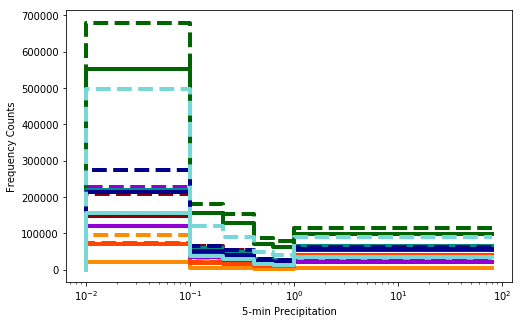

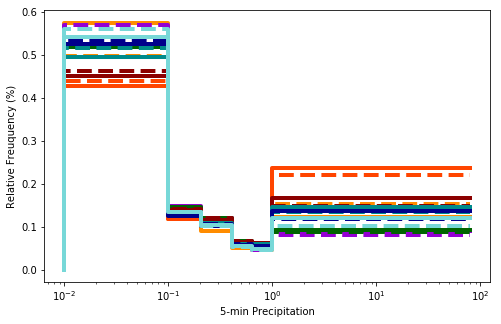

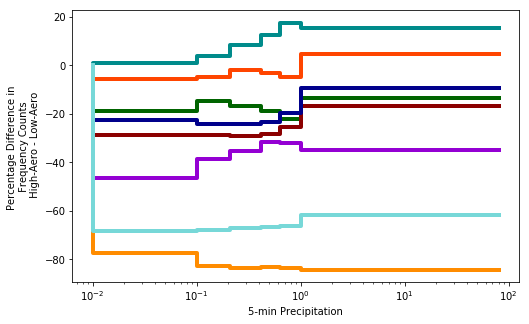

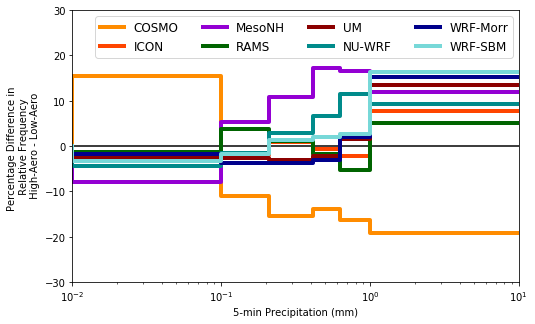

In [19]:
fig = plt.figure(figsize=[8,5]);
cnt = 0 
for model in models:
    for case in cases:
        plt_data = np.insert(mod_hist[model,case],0,0)
        plt.step(bin_e,plt_data,color=color[model],
            linestyle=ls[case],
            linewidth=4,
            label=f'{modelnames[cnt]} {casenames[cntc]}')
plt.xscale('log')
plt.xlabel('5-min Precipitation')
plt.ylabel('Frequency Counts')

fig = plt.figure(figsize=[8,5]);
for model in models:
    for case in cases:
        plt_data = np.insert(mod_hist[model,case],0,0)
        plt.step(bin_e,plt_data/np.nansum(plt_data),color=color[model],
            linestyle=ls[case],
            linewidth=4,
            label=f'{modelnames[cnt]} {casenames[cntc]}')
plt.xscale('log')
plt.xlabel('5-min Precipitation')
plt.ylabel('Relative Freuquency (%)')
    
fig = plt.figure(figsize=[8,5]);
for model in models:
        plt_data = (mod_hist[model,'POL']-mod_hist[model,'CLN'])/mod_hist[model,'CLN']*100
        plt_data = np.insert(plt_data,0,0)
        plt.step(bin_e,plt_data,color=color[model],
            linestyle='-',
            linewidth=4,
            label=f'{modelnames[cnt]} {casenames[cntc]}')
plt.xscale('log')
plt.xlabel('5-min Precipitation')
plt.ylabel('Percentage Difference in \n Frequency Counts \n High-Aero - Low-Aero')

fig = plt.figure(figsize=[8,5]);
cnt = 0
plt.plot([0.01,10],[0,0],'-k')
for model in models:
        plt_data = (mod_hist[model,'POL']/np.nansum(mod_hist[model,'POL']) - mod_hist[model,'CLN']/np.nansum(mod_hist[model,'CLN'])) / (mod_hist[model,'CLN']/np.nansum(mod_hist[model,'CLN'])) * 100 
        plt_data = np.insert(plt_data,0,0)
        plt.step(bin_e,plt_data,color=color[model],
            linestyle='-',
            linewidth=4,
            label=f'{modelnames[cnt]}')
        cnt = cnt + 1
plt.xscale('log')
plt.ylim([-30,30])
plt.xlim([0.01,10])
plt.xlabel('5-min Precipitation (mm)')
plt.ylabel('Percentage Difference in \n Relative Frequency \n High-Aero - Low-Aero')
plt.legend(fontsize=12,ncol=4)           
    
#plt.hist(mod_5min_pcp[model,case].ravel())
#for i in np.arange(0,144):
#    fig = plt.figure(figsize=[6,6])
#    plt.contourf(mod_5min_pcp[model,case][:,:,i])
#    plt.colorbar()
#    plt.title(i)
#    plt.show()

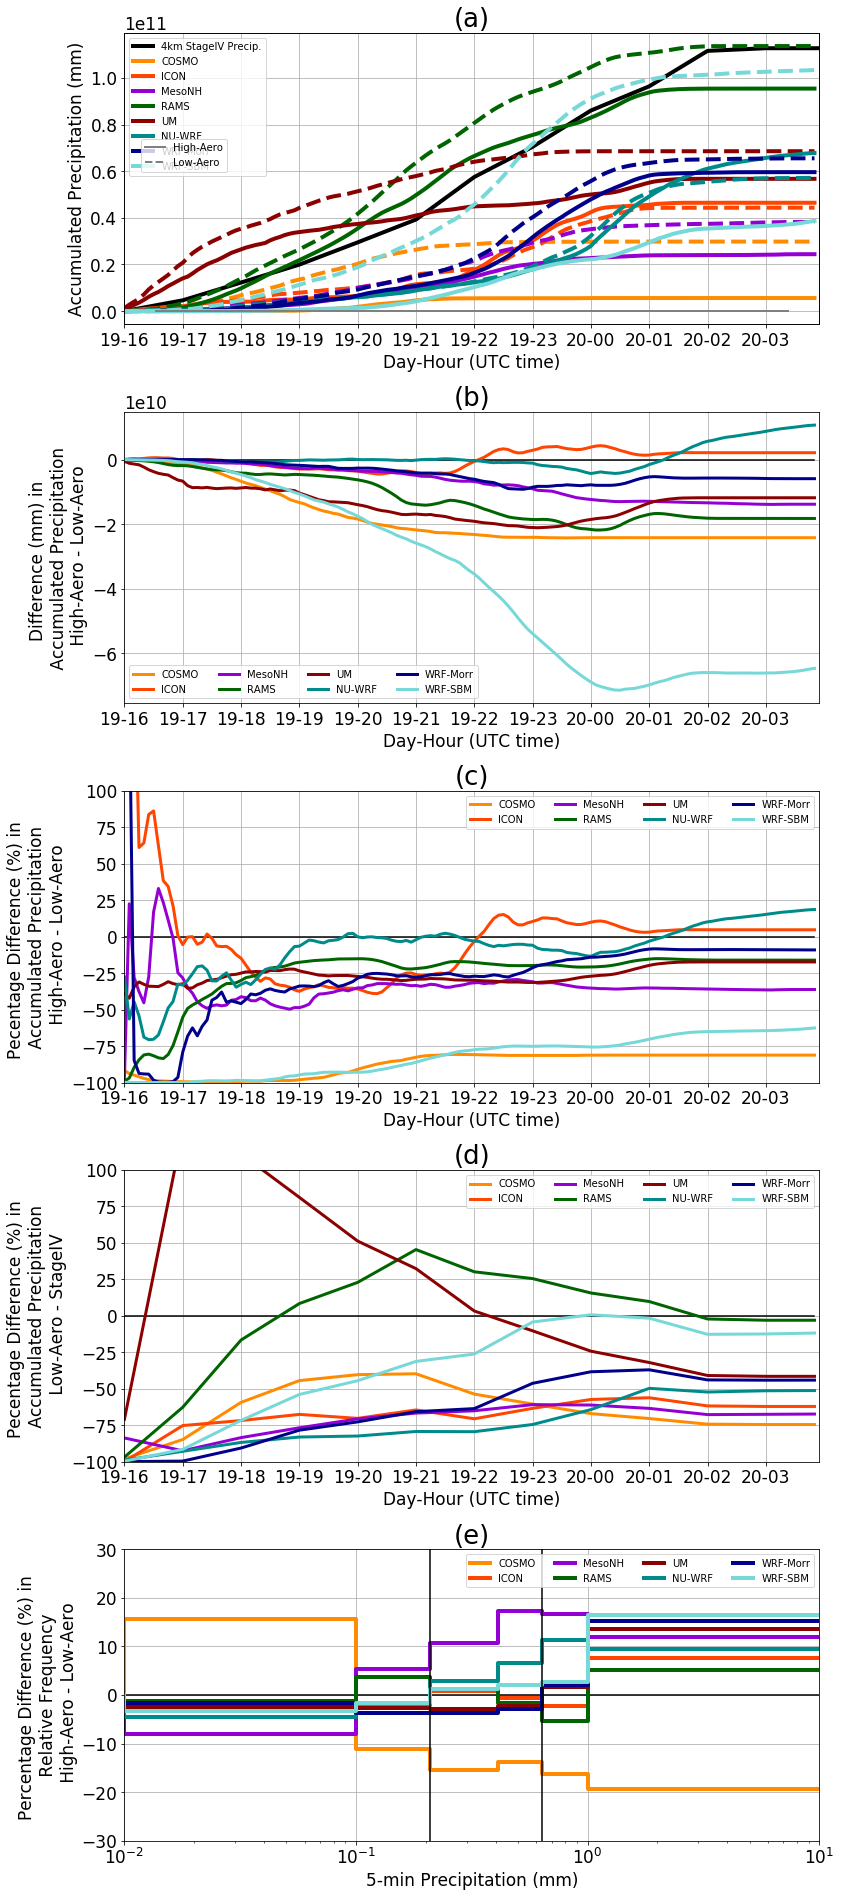

In [82]:
#### UPDATED April 23, 2024

ls={}
ls['CLN']='--'
ls['POL']='-'

vlines = [0.2083,0.6333]

mod_pcp_t = copy.deepcopy(precip_cum_time_scr_modi)
st4_pcp_t = copy.deepcopy(precip_cum_time_scr_st4)

mod_factor = 500*500
st4_factor = 4000*4000
area_factor = 1.14
lfs = 10
plt.rcParams.update({"font.size":17})

ttls = ['(a)','(b)','(c)','(d)','(e)']
tfs = 26

fig,ax = plt.subplots(5,1,figsize=[12,27])

# Plot Time Series of Accumulated Precipitation
i = 0
ax[i].plot(st4_dates[4:17],(st4_pcp_t[4:17]-st4_pcp_t[4])*st4_factor,'-k',lw=4,label='4km StageIV Precip.')
cnt = 0
for model in models:
    cntc = 0
    for case in cases:    
        if case == 'POL':
            labelname = f'{modelnames[cnt]}'
        elif case == 'CLN':
            labelname = '_nolegend_'
        ax[i].plot(mod_dates[0:143],mod_pcp_t[model,case][0:143]*st4_factor,
            color=color[model],
            linestyle=ls[case],
            linewidth=4,
            label=labelname)
        cntc = cntc + 1
    cnt = cnt + 1
    
ax2 = ax[i].twiny()
ax2.set(xticklabels=[])
ax2.tick_params(top=False)
ax2.plot(mod_dates[0:143],np.ones(len(mod_dates[0:143]))*-10000000,'-',lw=2,color='gray',label='High-Aero')
ax2.plot(mod_dates[0:143],np.ones(len(mod_dates[0:143]))*-10000000,'--',lw=2,color='gray',label='Low-Aero')

ax[i].set_xlim([mod_dates[0],mod_dates[143]])
ax[i].legend(fontsize=lfs,ncol=1)
ax[i].set_ylabel('Accumulated Precipitation (mm)')
ax[i].set_xlabel('Day-Hour (UTC time)')
ax[i].xaxis.set_major_formatter(mdates.DateFormatter("%d-%H"))
ax[i].set_title(ttls[i],fontsize=tfs)

handles, labels = ax2.get_legend_handles_labels()
fig.legend(handles, labels, fontsize=10, loc='upper left',bbox_to_anchor=[0.157,0.907])
#fig.legend(handles, labels, fontsize=14, loc='lower left', ncol=1, bbox_to_anchor=[0.04,0.01])

#handles, labels = ax[0].get_legend_handles_labels()
#fig.legend(handles, labels, fontsize=12, loc='lower right',bbox_to_anchor=[0.95,0.43])
#fig.legend(handles, labels, fontsize=14, loc='lower left',ncol=4, bbox_to_anchor=[0.15,0.01])
    


i = 1
# Plot Absolute Difference in High-Aero - Low-Aero
ax[i].plot(mod_dates[0:143],np.zeros(len(mod_dates[0:143])),'-k')
cntm = 0
for model in models:
    ax[i].plot(mod_dates[0:143],(mod_pcp_t[model,'POL'][0:143]-mod_pcp_t[model,'CLN'][0:143])*st4_factor,
            color=color[model],
            linestyle='-',
            linewidth=3,
            label=f'{modelnames[cntm]}')
    cntm = cntm + 1
ax[i].legend(fontsize=lfs,ncol=4,loc='lower left')
ax[i].set_ylabel('Difference (mm) in \n Accumulated Precipitation \n High-Aero - Low-Aero')
ax[i].set_xlabel('Day-Hour (UTC time)')
ax[i].xaxis.set_major_formatter(mdates.DateFormatter("%d-%H"))
ax[i].set_xlim([mod_dates[0],mod_dates[143]])
ax[i].set_title(ttls[i],fontsize=tfs)

i = 2
# Plot Percentage Difference in High-Aero - Low-Aero
ax[i].plot(mod_dates[0:143],np.zeros(len(mod_dates[0:143])),'-k')
cntm = 0
for model in models:
    ax[i].plot(mod_dates[0:143],((mod_pcp_t[model,'POL'][0:143]-mod_pcp_t[model,'CLN'][0:143]))/mod_pcp_t[model,'CLN'][0:143]*100,
            color=color[model],
            linestyle='-',
            linewidth=3,
            label=f'{modelnames[cntm]}')
    cntm = cntm + 1
ax[i].legend(fontsize=lfs,ncol=4)
ax[i].set_xlim([mod_dates[0],mod_dates[143]])
ax[i].set_ylim([-100,100])
ax[i].set_ylabel('Pecentage Difference (%) in \n Accumulated Precipitation \n High-Aero - Low-Aero')
ax[i].set_xlabel('Day-Hour (UTC time)')
ax[i].xaxis.set_major_formatter(mdates.DateFormatter("%d-%H"))
ax[i].set_title(ttls[i],fontsize=tfs)

i = 3
# Plot Absolute Difference in Low_Aero - StageIV
ax[i].plot(mod_dates[0:143],np.zeros(len(mod_dates[0:143])),'-k')
cntm = 0

tids = np.arange(0,143,12)
tids = np.append(tids,142)

for model in models:
    ax[i].plot(mod_dates[tids],((mod_pcp_t[model,'CLN'][tids]*st4_factor)-(st4_pcp_t[4:17]*st4_factor))/(st4_pcp_t[4:17]*st4_factor)*100,
            color=color[model],
            linestyle='-',
            linewidth=3,
            label=f'{modelnames[cntm]}')
    cntm = cntm + 1
ax[i].legend(fontsize=lfs,ncol=4,loc='upper right')
ax[i].set_ylabel('Pecentage Difference (%) in \n Accumulated Precipitation \n Low-Aero - StageIV')
ax[i].set_xlabel('Day-Hour (UTC time)')
ax[i].xaxis.set_major_formatter(mdates.DateFormatter("%d-%H"))
ax[i].set_ylim([-100,100])
ax[i].set_xlim([mod_dates[0],mod_dates[143]])
ax[i].set_title(ttls[i],fontsize=tfs)

i = 4
# Plot Difference in 5-min Relative Frequency in High-Aero - Low-Aero
cnt = 0
ax[i].plot([0.01,10],[0,0],'-k')
for model in models:
    plt_data = (mod_hist[model,'POL']/np.nansum(mod_hist[model,'POL']) - mod_hist[model,'CLN']/np.nansum(mod_hist[model,'CLN'])) / (mod_hist[model,'CLN']/np.nansum(mod_hist[model,'CLN'])) * 100 
    plt_data = np.insert(plt_data,0,0)
    ax[i].step(bin_e,plt_data,color=color[model],
        linestyle='-',
        linewidth=4,
        label=f'{modelnames[cnt]}')
    cnt = cnt + 1
ax[i].set_xscale('log')
ax[i].plot([vlines[0],vlines[0]],[-30,30],'-k')
ax[i].plot([vlines[1],vlines[1]],[-30,30],'-k')
ax[i].set_ylim([-30,30])
ax[i].set_xlim([0.01,10])
ax[i].set_xlabel('5-min Precipitation (mm)')
ax[i].set_ylabel('Percentage Difference (%) in \n Relative Frequency \n High-Aero - Low-Aero')
ax[i].legend(fontsize=lfs,ncol=4)           
ax[i].set_title(ttls[i],fontsize=tfs)

# Add Grid Lines to all Panels
for i in np.arange(0,5):
    ax[i].grid()

plt.tight_layout()
plt.subplots_adjust(top=0.98, bottom=0.05, hspace=0.3)
plt.savefig('/gws/nopw/j04/acpc/public/pmarin/BAMS/Figs_2024/Precip_Subpanel_Plot.pdf')

COSMO_KIT
-74.56521961819823
-95.21562193795285
-81.18962306641217
ICON
-62.1666252270245
-60.360570622938425
4.773707381177485
MesoNH_Toulouse
-67.3771635645515
-79.18155197906565
-36.18443306691536
RAMS_CSU
-3.0178710439508283
-18.586747111156004
-16.053345327427028
UM_LEEDS
-41.50014999241576
-51.60061452364396
-17.265795604465186
WRF_NASA
-51.25123573926265
-42.151437517970436
18.666725935084393
WRF_OXF
-44.10122816396273
-49.15601056083263
-9.042743213923602
WRF_PNNL
-11.820319622911134
-66.98427063161327
-62.55857446160014


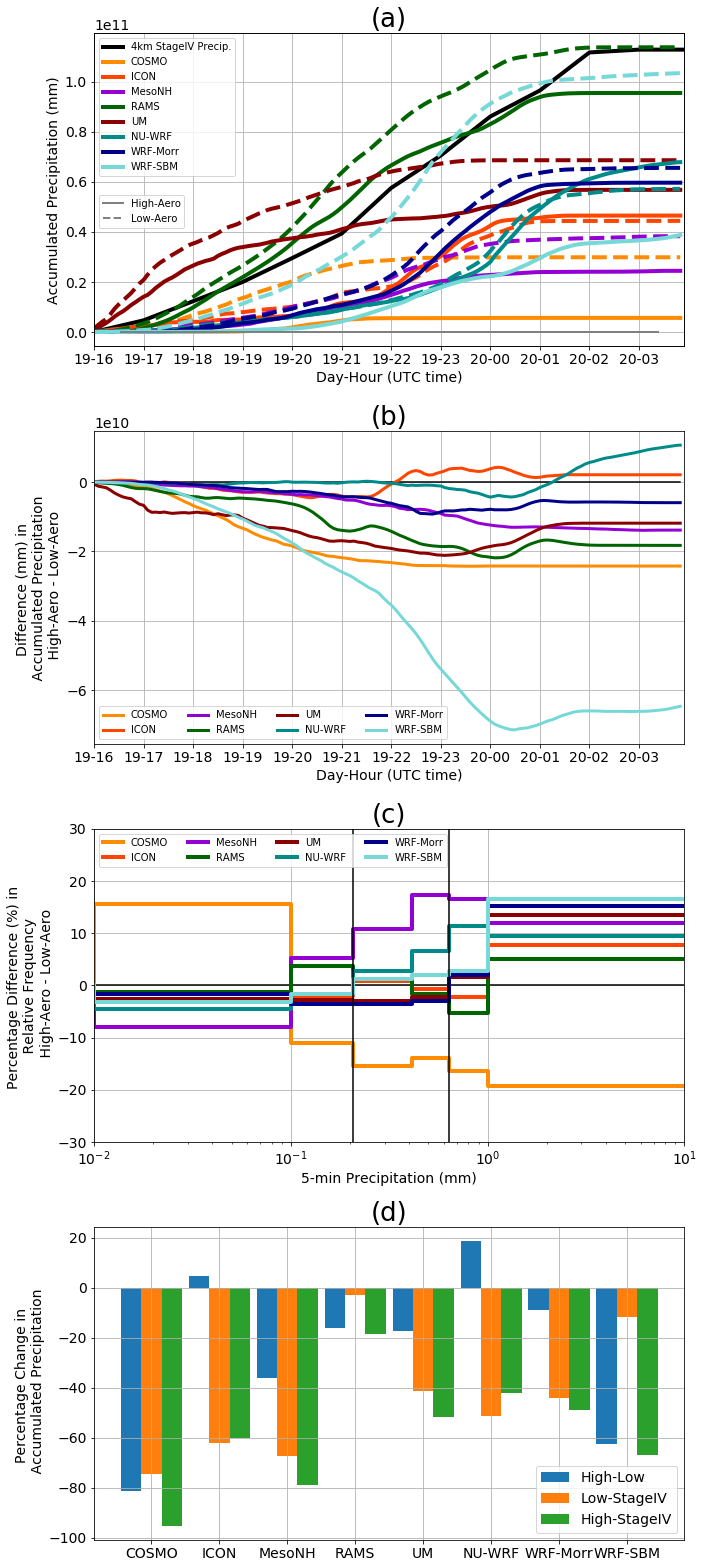

In [37]:
#### UPDATED August 26, 2024

ls={}
ls['CLN']='--'
ls['POL']='-'

vlines = [0.2083,0.6333]

mod_pcp_t = copy.deepcopy(precip_cum_time_scr_modi)
st4_pcp_t = copy.deepcopy(precip_cum_time_scr_st4)

mod_factor = 500*500
st4_factor = 4000*4000
area_factor = 1.14
lfs = 10
plt.rcParams.update({"font.size":14})

ttls = ['(a)','(b)','(c)','(d)']
tfs = 26

fig,ax = plt.subplots(4,1,figsize=[10,22])

# Plot Time Series of Accumulated Precipitation
i = 0
ax[i].plot(st4_dates[4:17],(st4_pcp_t[4:17]-st4_pcp_t[4])*st4_factor,'-k',lw=4,label='4km StageIV Precip.')
cnt = 0
for model in models:
    cntc = 0
    for case in cases:    
        if case == 'POL':
            labelname = f'{modelnames[cnt]}'
        elif case == 'CLN':
            labelname = '_nolegend_'
        ax[i].plot(mod_dates[0:143],mod_pcp_t[model,case][0:143]*st4_factor,
            color=color[model],
            linestyle=ls[case],
            linewidth=4,
            label=labelname)
        cntc = cntc + 1
    cnt = cnt + 1
    
ax2 = ax[i].twiny()
ax2.set(xticklabels=[])
ax2.tick_params(top=False)
ax2.plot(mod_dates[0:143],np.ones(len(mod_dates[0:143]))*-10000000,'-',lw=2,color='gray',label='High-Aero')
ax2.plot(mod_dates[0:143],np.ones(len(mod_dates[0:143]))*-10000000,'--',lw=2,color='gray',label='Low-Aero')

ax[i].set_xlim([mod_dates[0],mod_dates[143]])
ax[i].legend(fontsize=lfs,ncol=1)
ax[i].set_ylabel('Accumulated Precipitation (mm)')
ax[i].set_xlabel('Day-Hour (UTC time)')
ax[i].xaxis.set_major_formatter(mdates.DateFormatter("%d-%H"))
ax[i].set_title(ttls[i],fontsize=tfs)

handles, labels = ax2.get_legend_handles_labels()
fig.legend(handles, labels, fontsize=lfs, loc='upper left',bbox_to_anchor=[0.13,0.87])
#fig.legend(handles, labels, fontsize=14, loc='lower left', ncol=1, bbox_to_anchor=[0.04,0.01])

#handles, labels = ax[0].get_legend_handles_labels()
#fig.legend(handles, labels, fontsize=12, loc='lower right',bbox_to_anchor=[0.95,0.43])
#fig.legend(handles, labels, fontsize=14, loc='lower left',ncol=4, bbox_to_anchor=[0.15,0.01])
    
i = 1
# Plot Absolute Difference in High-Aero - Low-Aero
ax[i].plot(mod_dates[0:143],np.zeros(len(mod_dates[0:143])),'-k')
cntm = 0
for model in models:
    ax[i].plot(mod_dates[0:143],(mod_pcp_t[model,'POL'][0:143]-mod_pcp_t[model,'CLN'][0:143])*st4_factor,
            color=color[model],
            linestyle='-',
            linewidth=3,
            label=f'{modelnames[cntm]}')
    cntm = cntm + 1
ax[i].legend(fontsize=lfs,ncol=4,loc='lower left')
ax[i].set_ylabel('Difference (mm) in \n Accumulated Precipitation \n High-Aero - Low-Aero')
ax[i].set_xlabel('Day-Hour (UTC time)')
ax[i].xaxis.set_major_formatter(mdates.DateFormatter("%d-%H"))
ax[i].set_xlim([mod_dates[0],mod_dates[143]])
ax[i].set_title(ttls[i],fontsize=tfs)

i = 2
# Plot Difference in 5-min Relative Frequency in High-Aero - Low-Aero
cnt = 0
ax[i].plot([0.01,10],[0,0],'-k')
for model in models:
    plt_data = (mod_hist[model,'POL']/np.nansum(mod_hist[model,'POL']) - mod_hist[model,'CLN']/np.nansum(mod_hist[model,'CLN'])) / (mod_hist[model,'CLN']/np.nansum(mod_hist[model,'CLN'])) * 100 
    plt_data = np.insert(plt_data,0,0)
    ax[i].step(bin_e,plt_data,color=color[model],
        linestyle='-',
        linewidth=4,
        label=f'{modelnames[cnt]}')
    cnt = cnt + 1
ax[i].set_xscale('log')
ax[i].plot([vlines[0],vlines[0]],[-30,30],'-k')
ax[i].plot([vlines[1],vlines[1]],[-30,30],'-k')
ax[i].set_ylim([-30,30])
ax[i].set_xlim([0.01,10])
ax[i].set_xlabel('5-min Precipitation (mm)')
ax[i].set_ylabel('Percentage Difference (%) in \n Relative Frequency \n High-Aero - Low-Aero')
ax[i].legend(fontsize=lfs,ncol=4)           
ax[i].set_title(ttls[i],fontsize=tfs)

# Calculate percentage differences between model simulations and STAGEIV
pct_arr = np.zeros((3,8))
cntm = 0
for model in models:
    print(model)
    print((((mod_pcp_t[model,'CLN'][142])-(st4_pcp_t[17]))/st4_pcp_t[17])*100)
    print((((mod_pcp_t[model,'POL'][142])-(st4_pcp_t[17]))/st4_pcp_t[17])*100)
    print((((mod_pcp_t[model,'POL'][142])-(mod_pcp_t[model,'CLN'][142]))/mod_pcp_t[model,'CLN'][142])*100)##

    pct_arr[0,cntm] = (((mod_pcp_t[model,'POL'][142])-(mod_pcp_t[model,'CLN'][142]))/mod_pcp_t[model,'CLN'][142])*100
    pct_arr[1,cntm] = (((mod_pcp_t[model,'CLN'][142])-(st4_pcp_t[17]))/st4_pcp_t[17])*100
    pct_arr[2,cntm] = (((mod_pcp_t[model,'POL'][142])-(st4_pcp_t[17]))/st4_pcp_t[17])*100
    
    cntm = cntm + 1  

x_pos = np.arange(len(models))    
wid = 0.3
ax[3].bar(x_pos-0.3,pct_arr[0,:],width=wid,label='High-Low')
ax[3].bar(x_pos-0,pct_arr[1,:],width=wid,label='Low-StageIV')
ax[3].bar(x_pos+0.3,pct_arr[2,:],width=wid,label='High-StageIV')
ax[3].set_title('(d)',fontsize=tfs)
ax[3].set_xticks(x_pos)
ax[3].set_xticklabels(modelnames)
ax[3].set_ylabel('Percentage Change in \n Accumulated Precipitation')
ax[3].legend()

# Add Grid Lines to all Panels
for i in np.arange(0,4):
    ax[i].grid()

plt.tight_layout()
#plt.savefig('/gws/nopw/j04/acpc/public/pmarin/BAMS/Figs_2024/Precip_Subpanel_Plot_202408.pdf')


In [48]:
mod_pcp_t[model,'CLN'][142]

6463.041507501646

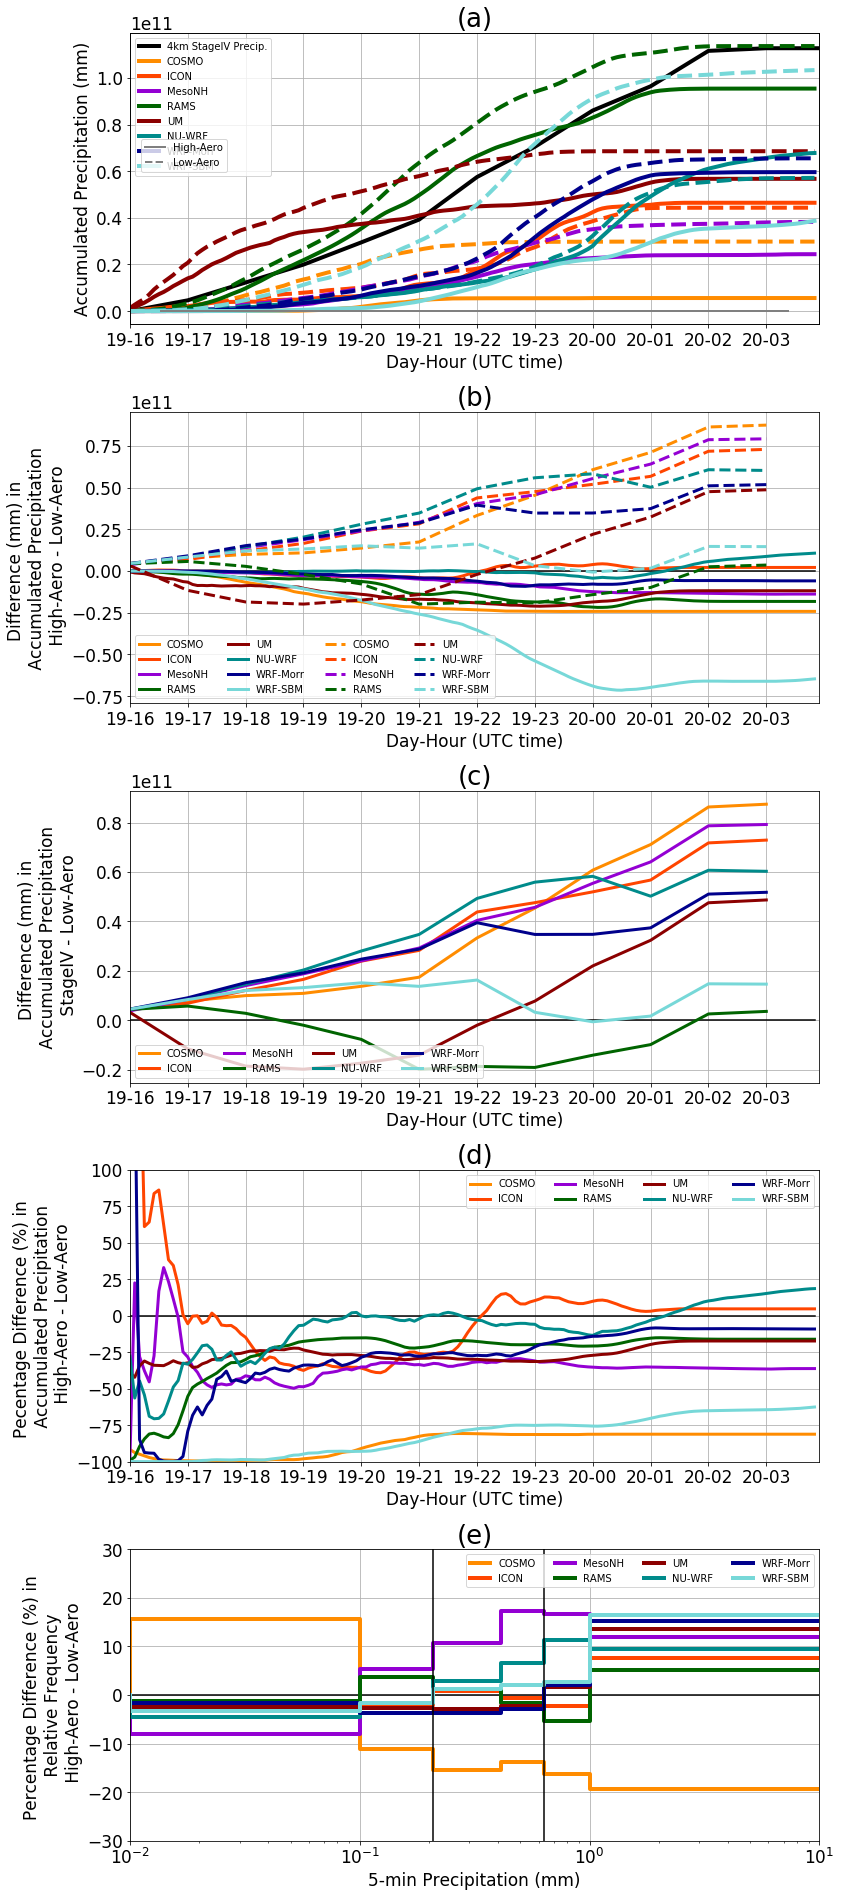

In [35]:
#### UPDATED April 23, 2024

ls={}
ls['CLN']='--'
ls['POL']='-'

vlines = [0.2083,0.6333]

mod_pcp_t = copy.deepcopy(precip_cum_time_scr_modi)
st4_pcp_t = copy.deepcopy(precip_cum_time_scr_st4)

mod_factor = 500*500
st4_factor = 4000*4000
area_factor = 1.14
lfs = 10
plt.rcParams.update({"font.size":17})

ttls = ['(a)','(b)','(c)','(d)','(e)']
tfs = 26

fig,ax = plt.subplots(5,1,figsize=[12,27])

# Plot Time Series of Accumulated Precipitation
i = 0
ax[i].plot(st4_dates[4:17],(st4_pcp_t[4:17]-st4_pcp_t[4])*st4_factor,'-k',lw=4,label='4km StageIV Precip.')
cnt = 0
for model in models:
    cntc = 0
    for case in cases:    
        if case == 'POL':
            labelname = f'{modelnames[cnt]}'
        elif case == 'CLN':
            labelname = '_nolegend_'
        ax[i].plot(mod_dates[0:143],mod_pcp_t[model,case][0:143]*st4_factor,
            color=color[model],
            linestyle=ls[case],
            linewidth=4,
            label=labelname)
        cntc = cntc + 1
    cnt = cnt + 1
    
ax2 = ax[i].twiny()
ax2.set(xticklabels=[])
ax2.tick_params(top=False)
ax2.plot(mod_dates[0:143],np.ones(len(mod_dates[0:143]))*-10000000,'-',lw=2,color='gray',label='High-Aero')
ax2.plot(mod_dates[0:143],np.ones(len(mod_dates[0:143]))*-10000000,'--',lw=2,color='gray',label='Low-Aero')

ax[i].set_xlim([mod_dates[0],mod_dates[143]])
ax[i].legend(fontsize=lfs,ncol=1)
ax[i].set_ylabel('Accumulated Precipitation (mm)')
ax[i].set_xlabel('Day-Hour (UTC time)')
ax[i].xaxis.set_major_formatter(mdates.DateFormatter("%d-%H"))
ax[i].set_title(ttls[i],fontsize=tfs)

handles, labels = ax2.get_legend_handles_labels()
fig.legend(handles, labels, fontsize=10, loc='upper left',bbox_to_anchor=[0.157,0.907])
#fig.legend(handles, labels, fontsize=14, loc='lower left', ncol=1, bbox_to_anchor=[0.04,0.01])

#handles, labels = ax[0].get_legend_handles_labels()
#fig.legend(handles, labels, fontsize=12, loc='lower right',bbox_to_anchor=[0.95,0.43])
#fig.legend(handles, labels, fontsize=14, loc='lower left',ncol=4, bbox_to_anchor=[0.15,0.01])
    


i = 1
# Plot Absolute Difference in High-Aero - Low-Aero
ax[i].plot(mod_dates[0:143],np.zeros(len(mod_dates[0:143])),'-k')
cntm = 0
for model in models:
    ax[i].plot(mod_dates[0:143],(mod_pcp_t[model,'POL'][0:143]-mod_pcp_t[model,'CLN'][0:143])*st4_factor,
            color=color[model],
            linestyle='-',
            linewidth=3,
            label=f'{modelnames[cntm]}')
    cntm = cntm + 1

tids = np.arange(0,143,12)
cntm = 0
for model in models:
    ax[i].plot(mod_dates[tids],((st4_pcp_t[4:16]*st4_factor)-(mod_pcp_t[model,'CLN'][tids]*st4_factor)),
            color=color[model],
            linestyle='--',
            linewidth=3,
            label=f'{modelnames[cntm]}')
    cntm = cntm + 1
    
ax[i].legend(fontsize=lfs,ncol=4,loc='lower left')
ax[i].set_ylabel('Difference (mm) in \n Accumulated Precipitation \n High-Aero - Low-Aero')
ax[i].set_xlabel('Day-Hour (UTC time)')
ax[i].xaxis.set_major_formatter(mdates.DateFormatter("%d-%H"))
ax[i].set_xlim([mod_dates[0],mod_dates[143]])
ax[i].set_title(ttls[i],fontsize=tfs)




i = 2
# Plot Absolute Difference in Low_Aero - StageIV
ax[i].plot(mod_dates[0:143],np.zeros(len(mod_dates[0:143])),'-k')
cntm = 0
tids = np.arange(0,143,12)
for model in models:
    ax[i].plot(mod_dates[tids],((st4_pcp_t[4:16]*st4_factor)-(mod_pcp_t[model,'CLN'][tids]*st4_factor)),
            color=color[model],
            linestyle='-',
            linewidth=3,
            label=f'{modelnames[cntm]}')
    cntm = cntm + 1
ax[i].legend(fontsize=lfs,ncol=4,loc='lower left')
ax[i].set_ylabel('Difference (mm) in \n Accumulated Precipitation \n StageIV - Low-Aero')
ax[i].set_xlabel('Day-Hour (UTC time)')
ax[i].xaxis.set_major_formatter(mdates.DateFormatter("%d-%H"))
ax[i].set_xlim([mod_dates[0],mod_dates[143]])
ax[i].set_title(ttls[i],fontsize=tfs)

i = 3
# Plot Percentage Difference in High-Aero - Low-Aero
ax[i].plot(mod_dates[0:143],np.zeros(len(mod_dates[0:143])),'-k')
cntm = 0
for model in models:
    ax[i].plot(mod_dates[0:143],((mod_pcp_t[model,'POL'][0:143]-mod_pcp_t[model,'CLN'][0:143]))/mod_pcp_t[model,'CLN'][0:143]*100,
            color=color[model],
            linestyle='-',
            linewidth=3,
            label=f'{modelnames[cntm]}')
    cntm = cntm + 1
ax[i].legend(fontsize=lfs,ncol=4)
ax[i].set_xlim([mod_dates[0],mod_dates[143]])
ax[i].set_ylim([-100,100])
ax[i].set_ylabel('Pecentage Difference (%) in \n Accumulated Precipitation \n High-Aero - Low-Aero')
ax[i].set_xlabel('Day-Hour (UTC time)')
ax[i].xaxis.set_major_formatter(mdates.DateFormatter("%d-%H"))
ax[i].set_title(ttls[i],fontsize=tfs)

i = 4
# Plot Difference in 5-min Relative Frequency in High-Aero - Low-Aero
cnt = 0
ax[i].plot([0.01,10],[0,0],'-k')
for model in models:
    plt_data = (mod_hist[model,'POL']/np.nansum(mod_hist[model,'POL']) - mod_hist[model,'CLN']/np.nansum(mod_hist[model,'CLN'])) / (mod_hist[model,'CLN']/np.nansum(mod_hist[model,'CLN'])) * 100 
    plt_data = np.insert(plt_data,0,0)
    ax[i].step(bin_e,plt_data,color=color[model],
        linestyle='-',
        linewidth=4,
        label=f'{modelnames[cnt]}')
    cnt = cnt + 1
ax[i].set_xscale('log')
ax[i].plot([vlines[0],vlines[0]],[-30,30],'-k')
ax[i].plot([vlines[1],vlines[1]],[-30,30],'-k')
ax[i].set_ylim([-30,30])
ax[i].set_xlim([0.01,10])
ax[i].set_xlabel('5-min Precipitation (mm)')
ax[i].set_ylabel('Percentage Difference (%) in \n Relative Frequency \n High-Aero - Low-Aero')
ax[i].legend(fontsize=lfs,ncol=4)           
ax[i].set_title(ttls[i],fontsize=tfs)

# Add Grid Lines to all Panels
for i in np.arange(0,5):
    ax[i].grid()

plt.tight_layout()
plt.subplots_adjust(top=0.98, bottom=0.05, hspace=0.3)
#plt.savefig('/gws/nopw/j04/acpc/public/pmarin/BAMS/Figs_2024/Precip_Subpanel_Plot.pdf')

In [30]:
print(len(st4_pcp_t[4:16]))
print(st4_dates[4:16])
ids = np.arange(0,143,12)
print(len(mod_pcp_t[model,'POL'][ids]))
print(mod_dates[ids])

12
[datetime.datetime(2013, 6, 19, 16, 0)
 datetime.datetime(2013, 6, 19, 17, 0)
 datetime.datetime(2013, 6, 19, 18, 0)
 datetime.datetime(2013, 6, 19, 19, 0)
 datetime.datetime(2013, 6, 19, 20, 0)
 datetime.datetime(2013, 6, 19, 21, 0)
 datetime.datetime(2013, 6, 19, 22, 0)
 datetime.datetime(2013, 6, 19, 23, 0)
 datetime.datetime(2013, 6, 20, 0, 0) datetime.datetime(2013, 6, 20, 1, 0)
 datetime.datetime(2013, 6, 20, 2, 0) datetime.datetime(2013, 6, 20, 3, 0)]
12
[datetime.datetime(2013, 6, 19, 16, 0)
 datetime.datetime(2013, 6, 19, 17, 0)
 datetime.datetime(2013, 6, 19, 18, 0)
 datetime.datetime(2013, 6, 19, 19, 0)
 datetime.datetime(2013, 6, 19, 20, 0)
 datetime.datetime(2013, 6, 19, 21, 0)
 datetime.datetime(2013, 6, 19, 22, 0)
 datetime.datetime(2013, 6, 19, 23, 0)
 datetime.datetime(2013, 6, 20, 0, 0) datetime.datetime(2013, 6, 20, 1, 0)
 datetime.datetime(2013, 6, 20, 2, 0) datetime.datetime(2013, 6, 20, 3, 0)]


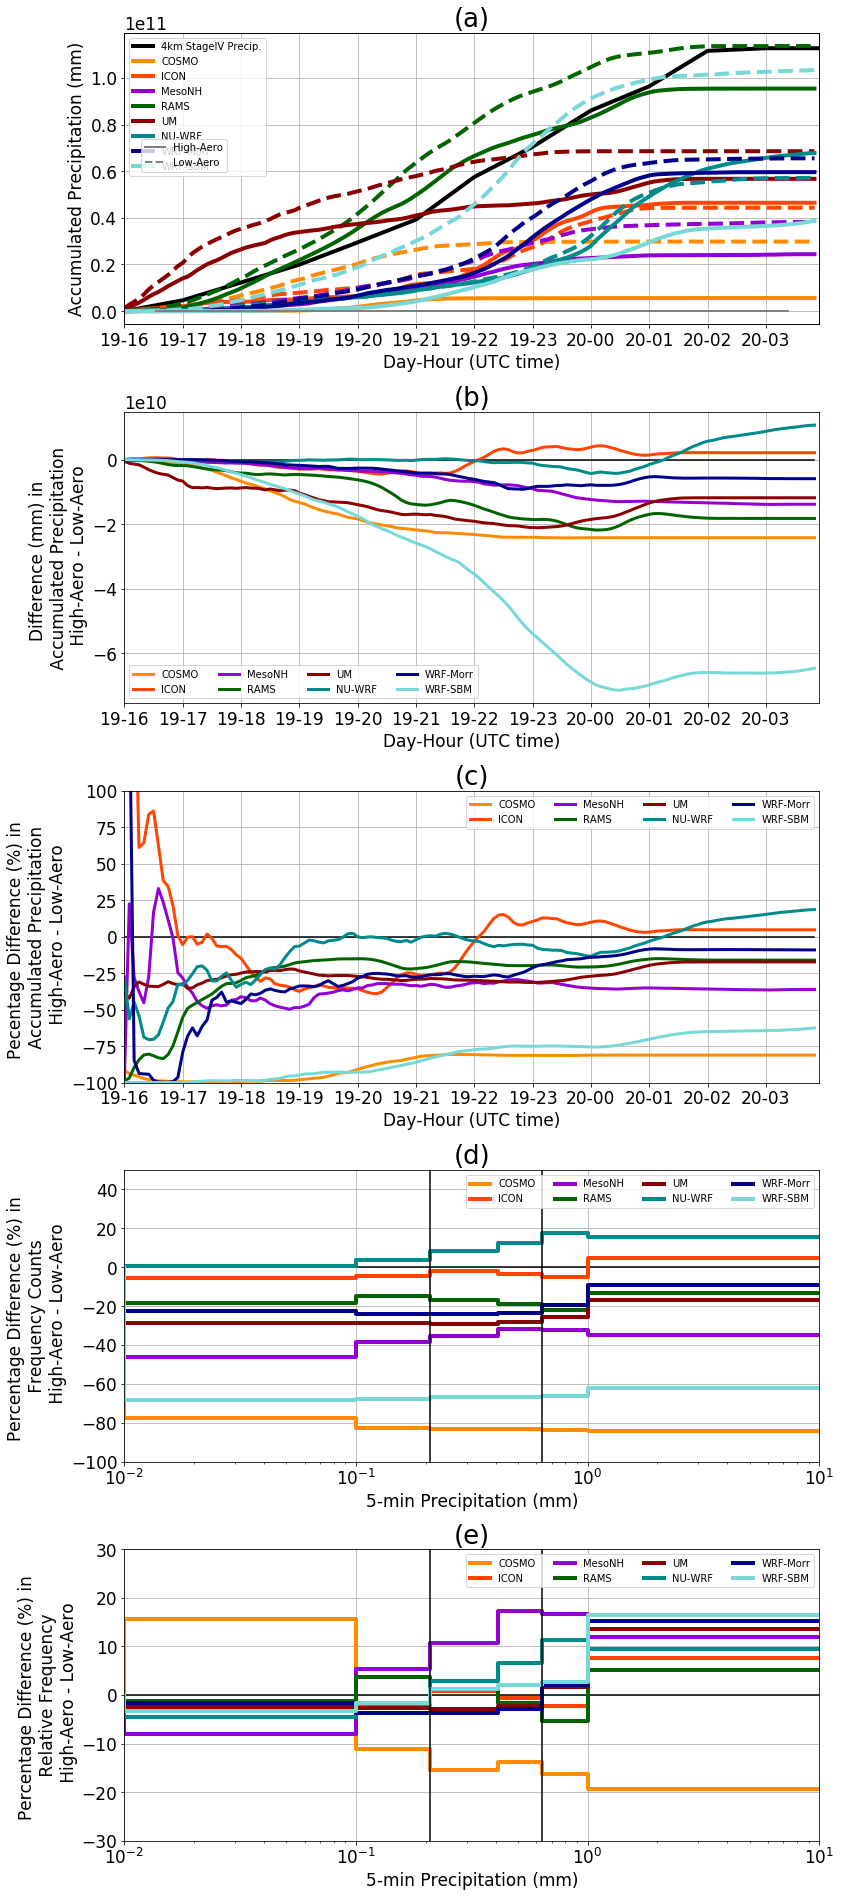

In [20]:
ls={}
ls['CLN']='--'
ls['POL']='-'

vlines = [0.2083,0.6333]

mod_pcp_t = copy.deepcopy(precip_cum_time_scr_modi)
st4_pcp_t = copy.deepcopy(precip_cum_time_scr_st4)

mod_factor = 500*500
st4_factor = 4000*4000
area_factor = 1.14
lfs = 10
plt.rcParams.update({"font.size":17})

ttls = ['(a)','(b)','(c)','(d)','(e)']
tfs = 26

fig,ax = plt.subplots(5,1,figsize=[12,27])

# Plot Time Series of Accumulated Precipitation
i = 0
ax[i].plot(st4_dates[4:17],(st4_pcp_t[4:17]-st4_pcp_t[4])*st4_factor,'-k',lw=4,label='4km StageIV Precip.')
cnt = 0
for model in models:
    cntc = 0
    for case in cases:    
        if case == 'POL':
            labelname = f'{modelnames[cnt]}'
        elif case == 'CLN':
            labelname = '_nolegend_'
        ax[i].plot(mod_dates[0:143],mod_pcp_t[model,case][0:143]*st4_factor,
            color=color[model],
            linestyle=ls[case],
            linewidth=4,
            label=labelname)
        cntc = cntc + 1
    cnt = cnt + 1
    
ax2 = ax[i].twiny()
ax2.set(xticklabels=[])
ax2.tick_params(top=False)
ax2.plot(mod_dates[0:143],np.ones(len(mod_dates[0:143]))*-10000000,'-',lw=2,color='gray',label='High-Aero')
ax2.plot(mod_dates[0:143],np.ones(len(mod_dates[0:143]))*-10000000,'--',lw=2,color='gray',label='Low-Aero')

ax[i].set_xlim([mod_dates[0],mod_dates[143]])
ax[i].legend(fontsize=lfs,ncol=1)
ax[i].set_ylabel('Accumulated Precipitation (mm)')
ax[i].set_xlabel('Day-Hour (UTC time)')
ax[i].xaxis.set_major_formatter(mdates.DateFormatter("%d-%H"))
ax[i].set_title(ttls[i],fontsize=tfs)

handles, labels = ax2.get_legend_handles_labels()
fig.legend(handles, labels, fontsize=10, loc='upper left',bbox_to_anchor=[0.157,0.907])
#fig.legend(handles, labels, fontsize=14, loc='lower left', ncol=1, bbox_to_anchor=[0.04,0.01])

#handles, labels = ax[0].get_legend_handles_labels()
#fig.legend(handles, labels, fontsize=12, loc='lower right',bbox_to_anchor=[0.95,0.43])
#fig.legend(handles, labels, fontsize=14, loc='lower left',ncol=4, bbox_to_anchor=[0.15,0.01])
    


i = 1
# Plot Absolute Difference in High-Aero - Low-Aero
ax[i].plot(mod_dates[0:143],np.zeros(len(mod_dates[0:143])),'-k')
cntm = 0
for model in models:
    ax[i].plot(mod_dates[0:143],(mod_pcp_t[model,'POL'][0:143]-mod_pcp_t[model,'CLN'][0:143])*st4_factor,
            color=color[model],
            linestyle='-',
            linewidth=3,
            label=f'{modelnames[cntm]}')
    cntm = cntm + 1
ax[i].legend(fontsize=lfs,ncol=4,loc='lower left')
ax[i].set_ylabel('Difference (mm) in \n Accumulated Precipitation \n High-Aero - Low-Aero')
ax[i].set_xlabel('Day-Hour (UTC time)')
ax[i].xaxis.set_major_formatter(mdates.DateFormatter("%d-%H"))
ax[i].set_xlim([mod_dates[0],mod_dates[143]])
ax[i].set_title(ttls[i],fontsize=tfs)

i = 2
# Plot Percentage Difference in High-Aero - Low-Aero
ax[i].plot(mod_dates[0:143],np.zeros(len(mod_dates[0:143])),'-k')
cntm = 0
for model in models:
    ax[i].plot(mod_dates[0:143],((mod_pcp_t[model,'POL'][0:143]-mod_pcp_t[model,'CLN'][0:143]))/mod_pcp_t[model,'CLN'][0:143]*100,
            color=color[model],
            linestyle='-',
            linewidth=3,
            label=f'{modelnames[cntm]}')
    cntm = cntm + 1
ax[i].legend(fontsize=lfs,ncol=4)
ax[i].set_xlim([mod_dates[0],mod_dates[143]])
ax[i].set_ylim([-100,100])
ax[i].set_ylabel('Pecentage Difference (%) in \n Accumulated Precipitation \n High-Aero - Low-Aero')
ax[i].set_xlabel('Day-Hour (UTC time)')
ax[i].xaxis.set_major_formatter(mdates.DateFormatter("%d-%H"))
ax[i].set_title(ttls[i],fontsize=tfs)

i = 3
# Plot Difference in 5-min Frequency in High-Aero - Low-Aero
ax[i].plot([0.01,10],[0,0],'-k')
cnt = 0
for model in models:
    plt_data = (mod_hist[model,'POL']-mod_hist[model,'CLN'])/mod_hist[model,'CLN']*100
    plt_data = np.insert(plt_data,0,0)
    ax[i].step(bin_e,plt_data,color=color[model],
        linestyle='-',
        linewidth=4,
        label=f'{modelnames[cnt]}')
    cnt = cnt + 1

ax[i].plot([vlines[0],vlines[0]],[-100,50],'-k')
ax[i].plot([vlines[1],vlines[1]],[-100,50],'-k')
    
ax[i].set_xscale('log')
ax[i].set_xlim([0.01,10])
ax[i].set_ylim([-100,50])
ax[i].set_xlabel('5-min Precipitation (mm)')
ax[i].set_ylabel('Percentage Difference (%) in \n Frequency Counts \n High-Aero - Low-Aero')
ax[i].legend(fontsize=lfs,ncol=4)
ax[i].set_title(ttls[i],fontsize=tfs)

i = 4
# Plot Difference in 5-min Relative Frequency in High-Aero - Low-Aero
cnt = 0
ax[i].plot([0.01,10],[0,0],'-k')
for model in models:
    plt_data = (mod_hist[model,'POL']/np.nansum(mod_hist[model,'POL']) - mod_hist[model,'CLN']/np.nansum(mod_hist[model,'CLN'])) / (mod_hist[model,'CLN']/np.nansum(mod_hist[model,'CLN'])) * 100 
    plt_data = np.insert(plt_data,0,0)
    ax[i].step(bin_e,plt_data,color=color[model],
        linestyle='-',
        linewidth=4,
        label=f'{modelnames[cnt]}')
    cnt = cnt + 1
ax[i].set_xscale('log')
ax[i].plot([vlines[0],vlines[0]],[-30,30],'-k')
ax[i].plot([vlines[1],vlines[1]],[-30,30],'-k')
ax[i].set_ylim([-30,30])
ax[i].set_xlim([0.01,10])
ax[i].set_xlabel('5-min Precipitation (mm)')
ax[i].set_ylabel('Percentage Difference (%) in \n Relative Frequency \n High-Aero - Low-Aero')
ax[i].legend(fontsize=lfs,ncol=4)           
ax[i].set_title(ttls[i],fontsize=tfs)

# Add Grid Lines to all Panels
for i in np.arange(0,5):
    ax[i].grid()

plt.tight_layout()
plt.subplots_adjust(top=0.98, bottom=0.05, hspace=0.3)
#plt.savefig('/gws/nopw/j04/acpc/public/pmarin/BAMS/Figs_2024/Precip_Subpanel_Plot.pdf')

/gws/nopw/j04/acpc/public/pmarin/BAMS/Precip/


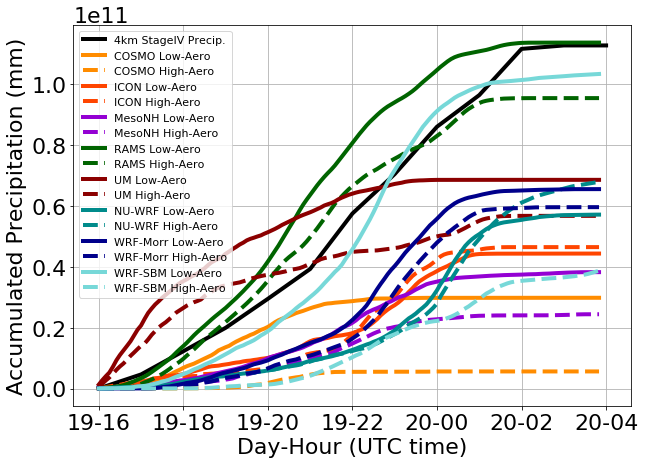

In [78]:
ls={}
ls['CLN']='-'
ls['POL']='--'

mod_factor = 500*500
st4_factor = 4000*4000
area_factor = 1.14
plt.rcParams.update({"font.size":22})
fig,ax = plt.subplots(1,1,figsize=[10,7])
plt.plot(st4_dates[4:17],(precip_cum_time_scr_st4[4:17]-precip_cum_time_scr_st4[4])*st4_factor,'-k',lw=4,label='4km StageIV Precip.')
cnt = 0
for model in models:
    cntc = 0
    for case in cases:    
        ax.plot(mod_dates[0:143],precip_cum_time_scr_modi[model,case][0:143]*st4_factor,
            color=color[model],
            linestyle=ls[case],
            linewidth=4,
            label=f'{modelnames[cnt]} {casenames[cntc]}')
        cntc = cntc + 1
    cnt = cnt + 1

ax.legend(fontsize=11,ncol=1)
ax.set_ylabel('Accumulated Precipitation (mm)')
ax.set_xlabel('Day-Hour (UTC time)')
ax.xaxis.set_major_formatter(mdates.DateFormatter("%d-%H"))
plt.grid()
print(plotdir)
#plt.savefig(plotdir+'/Accumulated_Precip_with_Time'+str(lat_bnd)+str(lon_bnd)+'_June2020_Interp.png')
#plt.savefig(plotdir+'/Accumulated_Precip_with_Time'+str(lat_bnd)+str(lon_bnd)+'_June2020_Interp.pdf')

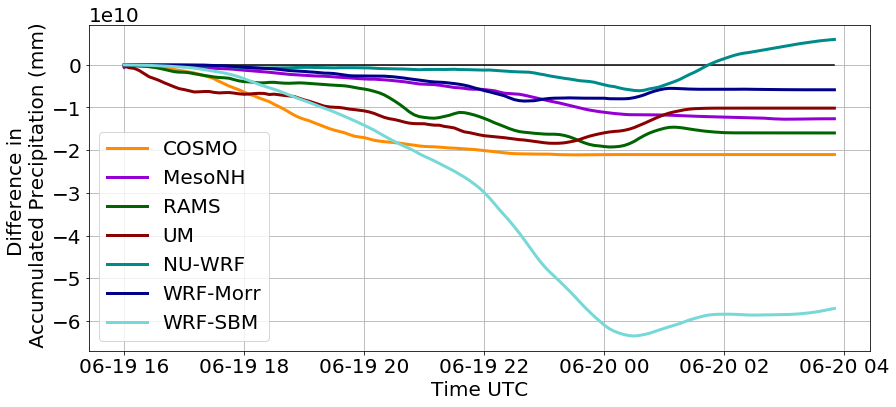

In [54]:
ls={}
ls['CLN']='--'
ls['POL']='-'

mod_factor = 500*500
st4_factor = 4000*4000
area_factor = 1.14
plt.rcParams.update({"font.size":20})
fig = plt.figure(figsize=[14,6])
plt.plot(mod_dates[0:143],np.zeros(len(mod_dates[0:143])),'-k')
cntm = 0
for model in models:
    plt.plot(mod_dates[0:143],(precip_cum_time_scr_mod[model,'POL'][0:143]-precip_cum_time_scr_mod[model,'CLN'][0:143])*mod_factor,
            color=color[model],
            linestyle=ls[case],
            linewidth=3,
            label=f'{modelnames[cntm]}')
    cntm = cntm + 1
plt.legend()
plt.grid()
plt.ylabel('Difference in \n Accumulated Precipitation (mm)')
plt.xlabel('Time UTC')
#plt.savefig(plotdir+'/Accumulated_Precip_DIF_with_Time'+str(lat_bnd)+str(lon_bnd)+'_Apr0820_Interp.pdf')

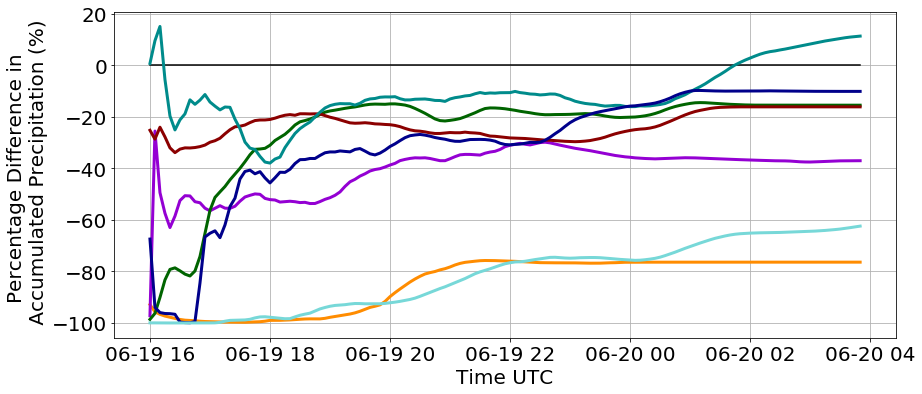

In [53]:
ls={}
ls['CLN']='--'
ls['POL']='-'

mod_factor = 500*500
st4_factor = 4000*4000
area_factor = 1.14
plt.rcParams.update({"font.size":20})
fig = plt.figure(figsize=[14,6])
plt.plot(mod_dates[0:143],np.zeros(len(mod_dates[0:143])),'-k')
cntm = 0
for model in models:
    plt.plot(mod_dates[0:143],(precip_cum_time_scr_mod[model,'POL'][0:143]-precip_cum_time_scr_mod[model,'CLN'][0:143])/precip_cum_time_scr_mod[model,'CLN'][0:143]*100,
            color=color[model],
            linestyle=ls[case],
            linewidth=3,
            label=f'{modelnames[cntm]}')
    cntm = cntm + 1
#plt.legend()
plt.grid()
plt.ylabel('Percentage Difference in \n Accumulated Precipitation (%)')
plt.xlabel('Time UTC')
plt.savefig(plotdir+'/Accumulated_Precip_PDIF_with_Time'+str(lat_bnd)+str(lon_bnd)+'_Apr0820_Interp.pdf')

COSMO_KIT
MesoNH_Toulouse
RAMS_CSU
UM_LEEDS
WRF_NASA
WRF_OXF
WRF_PNNL


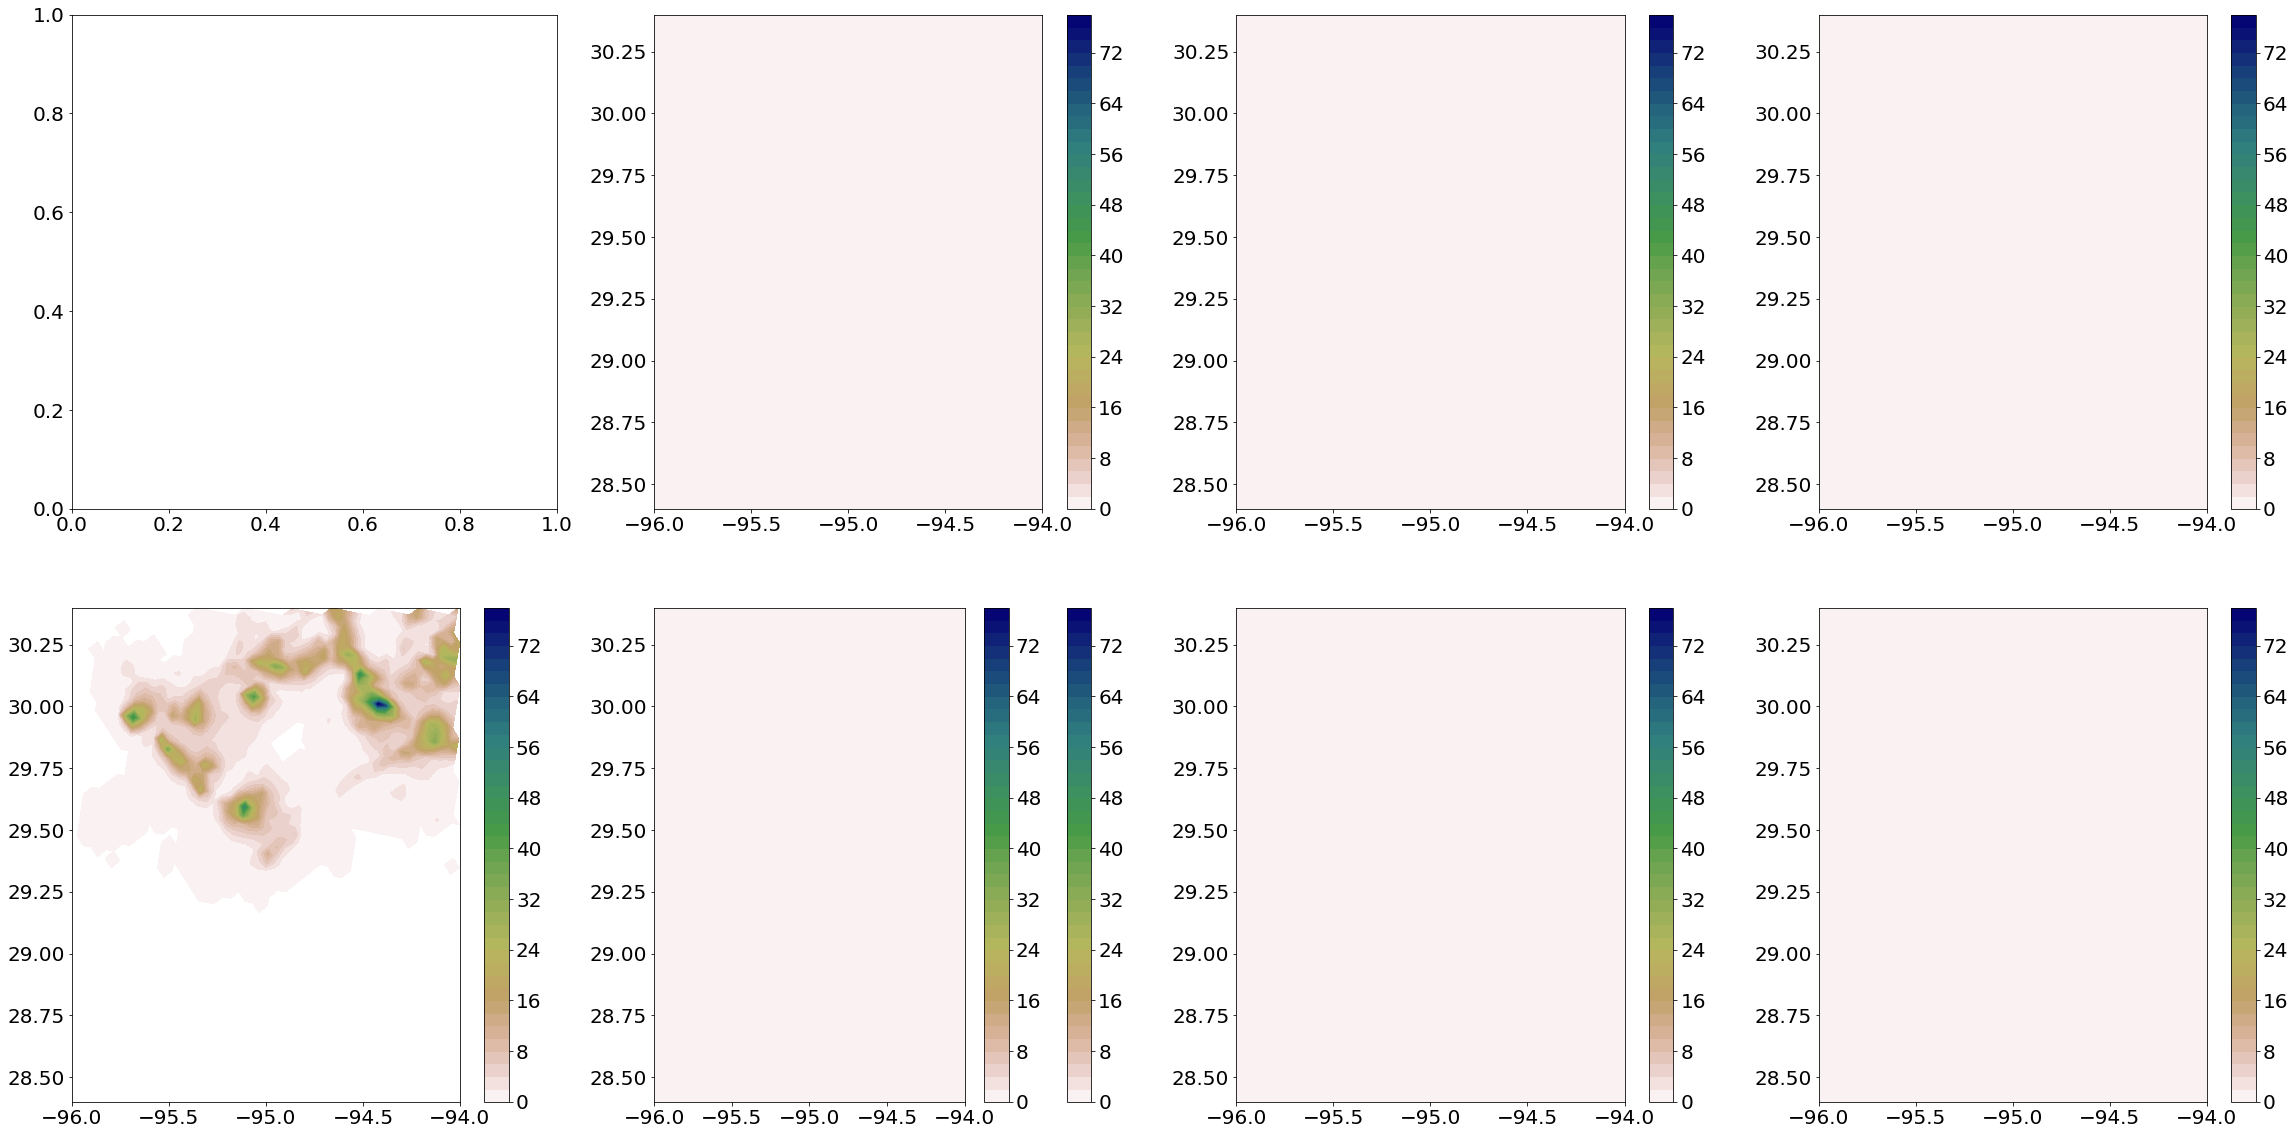

In [45]:

clevs = np.arange(0,80,2);
fig,axs = plt.subplots(2,4,figsize=(40,20))

#fig = plt.figure(figsize=[10,10])
case = 'POL'
cntm = 0; cntc = 1
for model in models:
    print(model)
    a = axs[cntm,cntc].contourf(mod_lon[model,case],mod_lat[model,case],precip_cum_scr_mod[model,case][:,:,144], levels = clevs, \
                               cmap=plt.cm.gist_earth_r,vmin = 0, vmax=80)
    axs[cntm,cntc].set_xlim(lon_bnd[1],lon_bnd[0])
    axs[cntm,cntc].set_ylim(lat_bnd[0],lat_bnd[1])
    c = plt.colorbar(a,ax=axs[cntm,cntc])
#    plt.clim(c, [0,80])

    cntc = cntc + 1
    if cntc == 4:
        cntc = 1; cntm = 1
    
    
a = axs[1,0].contourf(lon_st4,lat_st4,precip_cum_scr_st4[:,:,17]-precip_cum_scr_st4[:,:,4],  levels = clevs, \
                     cmap=plt.cm.gist_earth_r, vmin = 0, vmax=80)
axs[1,0].set_xlim(lon_bnd[1],lon_bnd[0])
axs[1,0].set_ylim(lat_bnd[0],lat_bnd[1])
plt.colorbar(a,ax = axs[1,0])
plt.savefig(plotdir+'Accumulated_Precip_Maps_'+str(lat_bnd)+str(lon_bnd)+'_'+case+'_Apr0820.png')

In [32]:
print(np.shape(precip_cum))

(77, 76, 24)


In [33]:
np.shape(lat_m); np.shape(lon_m)

(498, 498)

In [34]:
print(lat_st4)

[[28.374022 28.369154 28.364265 ... 27.961458 27.955011 27.948544]
 [28.40754  28.402666 28.39777  ... 27.994558 27.988106 27.98163 ]
 [28.441067 28.436188 28.431288 ... 28.02767  28.02121  28.014729]
 ...
 [30.884485 30.879234 30.873959 ... 30.439604 30.432657 30.425686]
 [30.918829 30.913572 30.90829  ... 30.473488 30.466534 30.459555]
 [30.953188 30.947926 30.942638 ... 30.507387 30.500425 30.49344 ]]


In [35]:
print(precip_cum_scr_st4[35,:,17])

[            nan             nan             nan             nan
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.29999995e-01  1.29999995e-01  1.29999995e-01  1.29999995e-01
  1.29999995e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  1.29999995e-01
  0.00000000e+00  1.29999995e-01  1.29999995e-01  1.29999995e-01
  2.50000000e-01  3.79999995e-01  2.59999990e-01  3.79999995e-01
  3.79999995e-01  6.39999986e-01  1.88999999e+00  1.88000000e+00
  1.50999999e+00  8.89999986e-01  6.29999995e-01  5.99999987e-02
  5.99999987e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000

In [36]:
precip_cum_scr_mod[model,case][200,:,144]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [37]:
import scipy
precip_cum_scr_mod_regrid = {}
precip_cum_time_scr_mod_regrid = {}
for model in models:
    for case in cases:
        regrid_data_t = np.zeros((77,76,145))
        for t in np.arange(0,145):
            print(model,case,t)
                        
            regrid_data = scipy.interpolate.griddata((mod_lon[model,case].flatten(),mod_lat[model,case].flatten()),precip_cum_scr_mod[model,case][:,:,t].flatten(),(lon_st4, lat_st4),method='linear')
            regrid_data_t[:,:,t] = copy.deepcopy(regrid_data)

#            fig, axs = plt.subplots(2,1,figsize=(10,10))
#            a = axs[0].contourf(mod_lon[model,case],mod_lat[model,case],precip_cum_scr_mod[model,case][:,:,t])
#            plt.colorbar(a,ax=axs[0])            
#            axs[1].contourf(lon_st4,lat_st4,regrid_data)
#            plt.colorbar(a,ax=axs[1])           
#            hhh

            
            
        precip_cum_scr_mod_regrid[model,case] = copy.deepcopy(regrid_data_t)            
        precip_cum_time_scr_mod_regrid[model,case] = np.nansum(np.nansum(precip_cum_scr_mod_regrid[model,case],axis=1),axis=0)

            

RAMS_CSU CLN 0
RAMS_CSU CLN 1
RAMS_CSU CLN 2
RAMS_CSU CLN 3
RAMS_CSU CLN 4
RAMS_CSU CLN 5
RAMS_CSU CLN 6
RAMS_CSU CLN 7
RAMS_CSU CLN 8
RAMS_CSU CLN 9
RAMS_CSU CLN 10
RAMS_CSU CLN 11
RAMS_CSU CLN 12
RAMS_CSU CLN 13
RAMS_CSU CLN 14
RAMS_CSU CLN 15
RAMS_CSU CLN 16
RAMS_CSU CLN 17
RAMS_CSU CLN 18
RAMS_CSU CLN 19
RAMS_CSU CLN 20
RAMS_CSU CLN 21
RAMS_CSU CLN 22
RAMS_CSU CLN 23
RAMS_CSU CLN 24
RAMS_CSU CLN 25
RAMS_CSU CLN 26
RAMS_CSU CLN 27
RAMS_CSU CLN 28
RAMS_CSU CLN 29
RAMS_CSU CLN 30
RAMS_CSU CLN 31
RAMS_CSU CLN 32
RAMS_CSU CLN 33
RAMS_CSU CLN 34
RAMS_CSU CLN 35
RAMS_CSU CLN 36
RAMS_CSU CLN 37
RAMS_CSU CLN 38
RAMS_CSU CLN 39
RAMS_CSU CLN 40
RAMS_CSU CLN 41
RAMS_CSU CLN 42
RAMS_CSU CLN 43
RAMS_CSU CLN 44
RAMS_CSU CLN 45
RAMS_CSU CLN 46
RAMS_CSU CLN 47
RAMS_CSU CLN 48
RAMS_CSU CLN 49
RAMS_CSU CLN 50
RAMS_CSU CLN 51
RAMS_CSU CLN 52
RAMS_CSU CLN 53
RAMS_CSU CLN 54
RAMS_CSU CLN 55
RAMS_CSU CLN 56
RAMS_CSU CLN 57
RAMS_CSU CLN 58
RAMS_CSU CLN 59
RAMS_CSU CLN 60
RAMS_CSU CLN 61
RAMS_CSU CLN 62
RA

COSMO_KIT POL 59
COSMO_KIT POL 60
COSMO_KIT POL 61
COSMO_KIT POL 62
COSMO_KIT POL 63
COSMO_KIT POL 64
COSMO_KIT POL 65
COSMO_KIT POL 66
COSMO_KIT POL 67
COSMO_KIT POL 68
COSMO_KIT POL 69
COSMO_KIT POL 70
COSMO_KIT POL 71
COSMO_KIT POL 72
COSMO_KIT POL 73
COSMO_KIT POL 74
COSMO_KIT POL 75
COSMO_KIT POL 76
COSMO_KIT POL 77
COSMO_KIT POL 78
COSMO_KIT POL 79
COSMO_KIT POL 80
COSMO_KIT POL 81
COSMO_KIT POL 82
COSMO_KIT POL 83
COSMO_KIT POL 84
COSMO_KIT POL 85
COSMO_KIT POL 86
COSMO_KIT POL 87
COSMO_KIT POL 88
COSMO_KIT POL 89
COSMO_KIT POL 90
COSMO_KIT POL 91
COSMO_KIT POL 92
COSMO_KIT POL 93
COSMO_KIT POL 94
COSMO_KIT POL 95
COSMO_KIT POL 96
COSMO_KIT POL 97
COSMO_KIT POL 98
COSMO_KIT POL 99
COSMO_KIT POL 100
COSMO_KIT POL 101
COSMO_KIT POL 102
COSMO_KIT POL 103
COSMO_KIT POL 104
COSMO_KIT POL 105
COSMO_KIT POL 106
COSMO_KIT POL 107
COSMO_KIT POL 108
COSMO_KIT POL 109
COSMO_KIT POL 110
COSMO_KIT POL 111
COSMO_KIT POL 112
COSMO_KIT POL 113
COSMO_KIT POL 114
COSMO_KIT POL 115
COSMO_KIT POL 1

WRF_NASA CLN 123
WRF_NASA CLN 124
WRF_NASA CLN 125
WRF_NASA CLN 126
WRF_NASA CLN 127
WRF_NASA CLN 128
WRF_NASA CLN 129
WRF_NASA CLN 130
WRF_NASA CLN 131
WRF_NASA CLN 132
WRF_NASA CLN 133
WRF_NASA CLN 134
WRF_NASA CLN 135
WRF_NASA CLN 136
WRF_NASA CLN 137
WRF_NASA CLN 138
WRF_NASA CLN 139
WRF_NASA CLN 140
WRF_NASA CLN 141
WRF_NASA CLN 142
WRF_NASA CLN 143
WRF_NASA CLN 144
WRF_NASA POL 0
WRF_NASA POL 1
WRF_NASA POL 2
WRF_NASA POL 3
WRF_NASA POL 4
WRF_NASA POL 5
WRF_NASA POL 6
WRF_NASA POL 7
WRF_NASA POL 8
WRF_NASA POL 9
WRF_NASA POL 10
WRF_NASA POL 11
WRF_NASA POL 12
WRF_NASA POL 13
WRF_NASA POL 14
WRF_NASA POL 15
WRF_NASA POL 16
WRF_NASA POL 17
WRF_NASA POL 18
WRF_NASA POL 19
WRF_NASA POL 20
WRF_NASA POL 21
WRF_NASA POL 22
WRF_NASA POL 23
WRF_NASA POL 24
WRF_NASA POL 25
WRF_NASA POL 26
WRF_NASA POL 27
WRF_NASA POL 28
WRF_NASA POL 29
WRF_NASA POL 30
WRF_NASA POL 31
WRF_NASA POL 32
WRF_NASA POL 33
WRF_NASA POL 34
WRF_NASA POL 35
WRF_NASA POL 36
WRF_NASA POL 37
WRF_NASA POL 38
WRF_NASA POL

MesoNH_Toulouse POL 92
MesoNH_Toulouse POL 93
MesoNH_Toulouse POL 94
MesoNH_Toulouse POL 95
MesoNH_Toulouse POL 96
MesoNH_Toulouse POL 97
MesoNH_Toulouse POL 98
MesoNH_Toulouse POL 99
MesoNH_Toulouse POL 100
MesoNH_Toulouse POL 101
MesoNH_Toulouse POL 102
MesoNH_Toulouse POL 103
MesoNH_Toulouse POL 104
MesoNH_Toulouse POL 105
MesoNH_Toulouse POL 106
MesoNH_Toulouse POL 107
MesoNH_Toulouse POL 108
MesoNH_Toulouse POL 109
MesoNH_Toulouse POL 110
MesoNH_Toulouse POL 111
MesoNH_Toulouse POL 112
MesoNH_Toulouse POL 113
MesoNH_Toulouse POL 114
MesoNH_Toulouse POL 115
MesoNH_Toulouse POL 116
MesoNH_Toulouse POL 117
MesoNH_Toulouse POL 118
MesoNH_Toulouse POL 119
MesoNH_Toulouse POL 120
MesoNH_Toulouse POL 121
MesoNH_Toulouse POL 122
MesoNH_Toulouse POL 123
MesoNH_Toulouse POL 124
MesoNH_Toulouse POL 125
MesoNH_Toulouse POL 126
MesoNH_Toulouse POL 127
MesoNH_Toulouse POL 128
MesoNH_Toulouse POL 129
MesoNH_Toulouse POL 130
MesoNH_Toulouse POL 131
MesoNH_Toulouse POL 132
MesoNH_Toulouse POL 133


In [ ]:
print(str(lat_bnd))

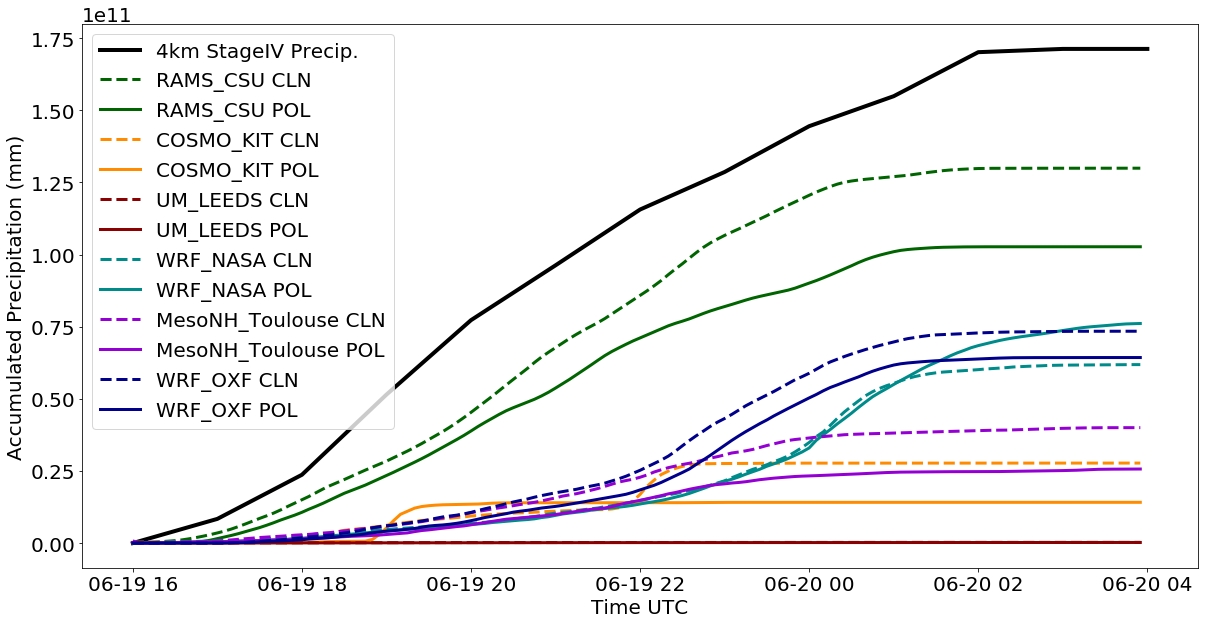

In [42]:
ls={}
ls['CLN']='--'
ls['POL']='-'

st4_factor = 4000*4000
plt.rcParams.update({"font.size":20})
fig = plt.figure(figsize=[20,10])
plt.plot(st4_dates[4:17],(precip_cum_time_st4[4:17]-precip_cum_time_st4[4])*st4_factor,'-k',lw=4,label='4km StageIV Precip.')
for model in models:
    for case in cases:    
        plt.plot(mod_dates[0:144],precip_cum_time_scr_mod_regrid[model,case][0:144]*st4_factor,
            color=color[model],
            linestyle=ls[case],
            linewidth=3,
            label=f'{model} {case}')
plt.legend()
plt.ylabel('Accumulated Precipitation (mm)')
plt.xlabel('Time UTC')
plt.savefig('Regrid_Accumulated_Precip_with_Time'+str(lat_bnd)+str(lon_bnd)+'.png')

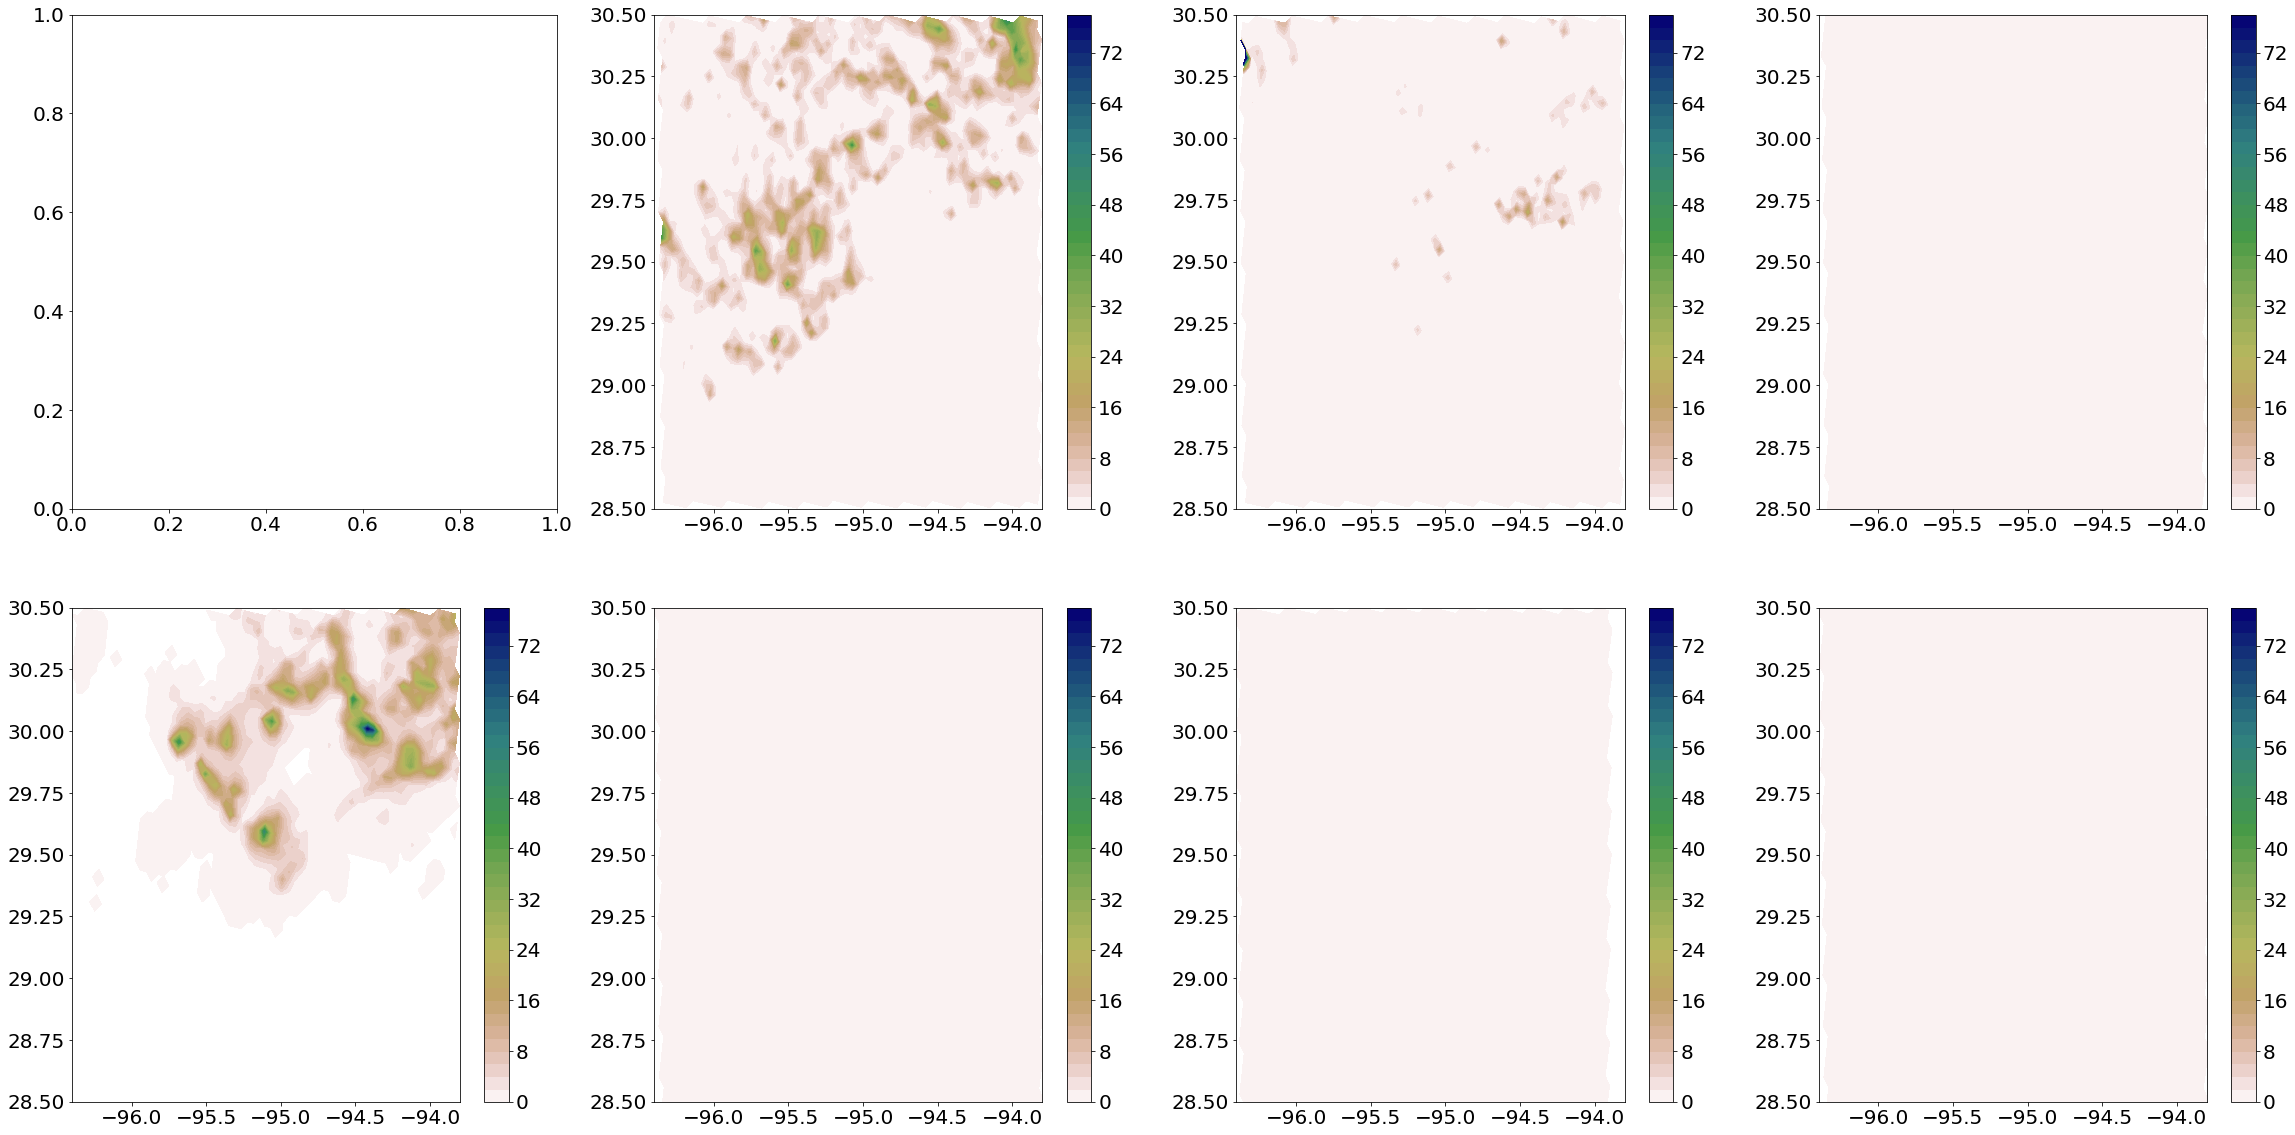

In [39]:
fig,axs = plt.subplots(2,4,figsize=(40,20))
clevs = np.arange(0,80,2);
#fig = plt.figure(figsize=[10,10])
case = 'CLN'
cntm = 0; cntc = 1
for model in models:
    a = axs[cntm,cntc].contourf(lon_st4,lat_st4,precip_cum_scr_mod_regrid[model,case][:,:,144], levels=clevs, \
                               cmap=plt.cm.gist_earth_r,vmin = 0, vmax=80)
    axs[cntm,cntc].set_xlim(lon_bnd[1],lon_bnd[0])
    axs[cntm,cntc].set_ylim(lat_bnd[0],lat_bnd[1])
    plt.colorbar(a,ax=axs[cntm,cntc])
    #plt.clim(0,80)

    cntc = cntc + 1
    if cntc == 4:
        cntc = 1; cntm = 1
    
    
a = axs[1,0].contourf(lon_st4,lat_st4,precip_cum_scr_st4[:,:,17]-precip_cum_scr_st4[:,:,4], levels=clevs, \
                     cmap=plt.cm.gist_earth_r,vmin = 0, vmax=80)
axs[1,0].set_xlim(lon_bnd[1],lon_bnd[0])
axs[1,0].set_ylim(lat_bnd[0],lat_bnd[1])
plt.colorbar(a,ax = axs[1,0])
plt.savefig('Regrid_Accumulated_Precip_Maps_'+str(lat_bnd)+str(lon_bnd)+'_'+case+'.png')